In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/atmosphere-dataset/exoplanet_atmo_NO_THERMAL_ONLY.csv
/kaggle/input/updated-exoplanet-dataset/PSCompPars_2025.08.29_20.45.24.csv
/kaggle/input/new-tess-confirmed-exoplanets/PS_2025.09.01_20.07.57.csv
/kaggle/input/test1-table/test1_table.csv
/kaggle/input/exoplanet-data/PSCompPars_2025.07.11_08.59.33.csv
/kaggle/input/atmosphere-comp/IAC_ExoAtmospheres___fully_cleaned__no_rows_skipped_.csv
/kaggle/input/test4-table/test4_table.csv
/kaggle/input/test7-table/test7_table.csv
/kaggle/input/updated-molecule-dataset/iac_exoplanet_atmospheres-20250914_unique_planets.csv


In [2]:
df = pd.read_csv(
    "/kaggle/input/updated-exoplanet-dataset/PSCompPars_2025.08.29_20.45.24.csv",
    skiprows=88,    # skip first 10 rows of metadata, change if needed
    delimiter='#',  # looks like columns are comma separated inside the big string
    header=None     # initially no header because of skipping
)
df

,0
0,"pl_name,hostname,sy_snum,sy_pnum,discoverymeth..."
1,"11 Com b,11 Com,2,1,Radial Velocity,2007,Xingl..."
2,"11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thuer..."
3,"14 And b,14 And,1,1,Radial Velocity,2008,Okaya..."
4,"14 Her b,14 Her,1,2,Radial Velocity,2002,W. M...."
...,...
5985,"ups And b,ups And,2,3,Radial Velocity,1996,Lic..."
5986,"ups And c,ups And,2,3,Radial Velocity,1999,Mul..."
5987,"ups And d,ups And,2,3,Radial Velocity,1999,Mul..."
5988,"ups Leo b,ups Leo,1,1,Radial Velocity,2021,Oka..."


In [3]:
df = df[0].str.split(",", expand=True)
df.columns = df.iloc[0]
df = df.iloc[1:]
df

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000000000,0.06000000000,...,-1.92380000,4.7230700,0.0230000,-0.0230000,2.2820000,0.3460000,-0.3460000,4.4403800,0.0038479,-0.0038479
2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997000000,3.20000000000,...,-1.97650000,5.0130000,0.0050000,-0.0050000,1.9390000,0.2700000,-0.2700000,4.5621600,0.0039035,-0.0039035
3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000000000,0.11000000000,...,-0.71400000,5.2313300,0.0230000,-0.0230000,2.3310000,0.2400000,-0.2400000,4.9178100,0.0028262,-0.0028262
4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890000000,1.67709000000,...,-0.00730000,6.6193500,0.0230000,-0.0230000,4.7140000,0.0160000,-0.0160000,6.3830000,0.0003512,-0.0003512
5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000000000,1.00000000000,...,-0.01110000,6.2150000,0.0160000,-0.0160000,4.6510000,0.0160000,-0.0160000,6.0642800,0.0006029,-0.0006029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.61703300000,0.00002300000,...,-0.06290000,4.0956500,0.0230000,-0.0230000,2.8590000,0.2740000,-0.2740000,3.9868700,0.0089371,-0.0089371
5986,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.25800000000,0.06400000000,...,-0.06290000,4.0956500,0.0230000,-0.0230000,2.8590000,0.2740000,-0.2740000,3.9868700,0.0089371,-0.0089371
5987,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.46000000000,0.57000000000,...,-0.06290000,4.0956500,0.0230000,-0.0230000,2.8590000,0.2740000,-0.2740000,3.9868700,0.0089371,-0.0089371
5988,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.20000000000,2.80000000000,...,-0.89630000,4.3049000,0.0230000,-0.0230000,2.1840000,0.2480000,-0.2480000,4.0304000,0.0085130,-0.0085130


In [4]:
counter = 0
for column in df.columns:
    for element in df[column]:
        if element == "":
            counter += 1
    print(f"{column} shape: {((df[column].shape)[0]) - counter}")
    counter = 0

pl_name shape: 5989
hostname shape: 5989
sy_snum shape: 5989
sy_pnum shape: 5989
discoverymethod shape: 5989
disc_year shape: 5989
disc_facility shape: 5989
pl_controv_flag shape: 5989
pl_orbper shape: 5685
pl_orbpererr1 shape: 5192
pl_orbpererr2 shape: 5192
pl_orbperlim shape: 5685
pl_orbsmax shape: 5693
pl_orbsmaxerr1 shape: 3749
pl_orbsmaxerr2 shape: 3749
pl_orbsmaxlim shape: 5694
pl_rade shape: 5966
pl_radeerr1 shape: 4131
pl_radeerr2 shape: 4131
pl_radelim shape: 5966
pl_radj shape: 5966
pl_radjerr1 shape: 4131
pl_radjerr2 shape: 4131
pl_radjlim shape: 5966
pl_bmasse shape: 5958
pl_bmasseerr1 shape: 2855
pl_bmasseerr2 shape: 2855
pl_bmasselim shape: 5958
pl_bmassj shape: 5958
pl_bmassjerr1 shape: 2855
pl_bmassjerr2 shape: 2855
pl_bmassjlim shape: 5958
pl_bmassprov shape: 5989
pl_orbeccen shape: 5115
pl_orbeccenerr1 shape: 1787
pl_orbeccenerr2 shape: 1787
pl_orbeccenlim shape: 5115
pl_insol shape: 4187
pl_insolerr1 shape: 3540
pl_insolerr2 shape: 3540
pl_insollim shape: 4187
pl_eqt

In [4]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass  # leave as object if not fully numeric

In [6]:
df.duplicated().sum() #check for duplicated entries

0

In [ ]:
df_original = df.copy()

old_df = df.copy()
old_df

In [7]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 12  
})

In [ ]:
old_df['pl_radelog10'] = np.log10(old_df['pl_rade'])

old_df['pl_radelog10'].hist(bins=50)
plt.xlabel('Planet Radius (Earth Radii) log 10')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Planet Radius log 10')
plt.show()


In [ ]:
old_df['pl_bmasselog10'] = np.log10(old_df['pl_bmasse'])

old_df['pl_bmasselog10'].hist(bins=50)

plt.xlabel('Planet Mass (Earth Mass) log 10')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Planet Mass log 10')
plt.show()

In [ ]:
old_df['orbperlog10'] = np.log10(old_df['pl_orbper'])


old_df['orbperlog10'].hist(bins=50);

plt.xlabel('Orbital Period (Days) log 10')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Orbital Period (Days) log 10')
plt.show()

In [ ]:
old_df['pl_eqt'].hist(bins=50);

plt.xlabel('Equilibrium Temperature of Planets in Kelvin')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Equilibrium Temperature of Planets in Kelvin')
plt.show()

In [ ]:
old_df['st_teff'].hist(bins=50);

plt.xlabel('Stellar Effective Temperature in Kelvin')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Stellar Effective Temperature in Kelvin')
plt.show()

In [ ]:
old_df['tefflog10'] = np.log10(old_df['st_teff'])

old_df['tefflog10'].hist(bins=50);

plt.xlabel('Stellar Effective Temperature in Kelvin')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Stellar Effective Temperature in Kelvin log 10')
plt.show()

In [ ]:
old_df['st_radlog10'] = np.log10(old_df['st_rad'])

old_df['st_radlog10'].hist(bins=50);
plt.xlabel('Stellar Radius Measured in Solar Radii')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Stellar Radius log 10')
plt.show()

In [ ]:
old_df['st_masslog10'] = np.log10(old_df['st_mass'])

old_df['st_masslog10'].hist(bins=50);

plt.xlabel('Stellar Mass Measured in Solar Masses')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of Stellar Masses log 10')
plt.show()

In [ ]:
old_df['orbsmaxlog10'] = np.log10(old_df['pl_orbsmax'])

old_df['orbsmaxlog10'].hist(bins=50);
plt.xlabel('Orbital Semi-Major Axis (AU)')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of the Orbital Semi-Major Axis log 10')
plt.show()

In [ ]:
old_df['sy_dist'].hist(bins=50);
plt.xlabel('Distance (PC)')  # Customize this label based on what pl_rade represents
plt.ylabel('Counts')
plt.title('Histogram of the Distance to the Planetary System from Earth')
plt.show()

In [ ]:
import  matplotlib.pyplot as plt
# Count values and plot bar chart manually
ax = old_df['discoverymethod'].value_counts().plot(kind='bar')
ax.set_yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Discovery Method')
plt.ylabel('Count (log scale)')
plt.title('Discovery Methods (Log Scale)')
plt.show()


In [ ]:
df_mr = df[
    pd.to_numeric(df['pl_bmasse'], errors='coerce').notna() &
    pd.to_numeric(df['pl_rade'], errors='coerce').notna()
].copy()
df_mr #this is the dataframe for rows that have both of the mass and the radius

In [ ]:
m_list = []
r_list = []
for i in df_mr.pl_bmasse:
    m_list.append(float(i))

for j in df_mr.pl_rade:
    r_list.append(float(j))


(m_list[0] * 9.8) / (r_list[0] ** 2)


In [ ]:
G = 6.67430 * (10**-11)

G*(m_list[0] * 6e24) / ((r_list[0]*6.4e6) ** 2)

In [ ]:
#G = 6.67430 * (10**-11)
df_mr['Ag'] = 9.8 * np.array(m_list) / (np.array(r_list) ** 2)

df_mr['Ag']

In [ ]:
df_mr['Aglog10'] = np.log10(df_mr['Ag'])

df_mr['Aglog10'].hist(bins=50); #the x is the surface gravity in m/s^2
# the y is the number of planets

plt.xlabel("Gravity in m/s^2 log 10")
plt.ylabel("Counts")
plt.title("Histogram of Exoplanet Gravities log 10")

In [ ]:
help(df_mr['Ag'].hist)
print(max(df_mr['Ag']))

In [ ]:
df_mr['Ag_error'] = abs(df_mr["Ag"] - 9.8) #absolute error
df_mr['Ag_error']



In [ ]:
df_mr['Ag_rel_error'] = df_mr['Ag_error']/9.8
df_mr['Ag_rel_error'] #relative error

In [ ]:
from fastai.tabular.all import *

#preprocessing steps, making all the numbers into floats/ints. filling missing with means. dropping columns, label encoding categorical columns



means = df_mr.mean(numeric_only=True)
df_mr = df_mr.fillna(means)

df_mr_cl = df_mr.drop(columns = ['pl_rade', 'pl_bmasse', 'Ag', 'pl_radj', 'pl_bmassj', "Aglog10", "Ag_rel_error"])


#splits = RandomSplitter(seed = 42)(df_mr_cl)

cont_names, cat_names = cont_cat_split(df_mr_cl, dep_var='Ag_error')
for i in cat_names:
    df_mr_cl[i] = pd.Categorical(df_mr_cl[i]).codes
print(f"Continous vars: {cont_names}")
print(f"Categorical vars: {cat_names}") 



In [ ]:
#modeling to identify the absolute error for surface gravity
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


X, y = df_mr_cl.drop(columns=['Ag_error']), df_mr_cl['Ag_error']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(100, min_samples_leaf=5)
rf.fit(X_train, y_train)
print(mean_absolute_error(y_val, rf.predict(X_val)))

# Print feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

#pd.DataFrame(dict(cols=X.columns, imp=rf.feature_importances_)).plot('cols', 'imp', 'barh');


In [ ]:
df_mr_rel = df_mr.drop(columns = ['pl_rade', 'pl_bmasse', 'Ag', 'pl_radj', 'pl_bmassj', "Aglog10", "Ag_error"])


conts, cats = cont_cat_split(df_mr_rel, dep_var='Ag_rel_error')
for j in cats:
    df_mr_rel[j] = pd.Categorical(df_mr_rel[j]).codes
print(f"Continous vars: {conts}")
print(f"Categorical vars: {cats}") 

In [ ]:
# Modeling to identify the relative error for surface gravity
X1, y1 = df_mr_rel.drop(columns=['Ag_rel_error']), df_mr_rel['Ag_rel_error']

X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train model
rf1 = RandomForestRegressor(100, min_samples_leaf=5)
rf1.fit(X1_train, y1_train)
print(mean_absolute_error(y1_val, rf1.predict(X1_val)))

# Print feature importances
importances1 = pd.Series(rf1.feature_importances_, index=X1.columns)
importances1.sort_values(ascending=False).head(10)

Using Random Forests to predict the radius from the mass

In [ ]:
df_rad = df_mr[['pl_rade', 'pl_bmasse']]
test_df_rad = df_rad.sample(frac=0.25, random_state=42)
train_df_rad = df_rad.drop(test_df_rad.index)

In [ ]:
low_mass_df = df_rad[df_rad['pl_bmasse']<=50]
high_mass_df = df_rad[df_rad['pl_bmasse']>50]

test_low_mass_df = low_mass_df.sample(frac=0.25, random_state=42)
train_low_mass_df = low_mass_df.drop(test_low_mass_df.index)

test_high_mass_df = high_mass_df.sample(frac=0.25, random_state=42)
train_high_mass_df = high_mass_df.drop(test_high_mass_df.index)

In [ ]:
normal_df_rad = df_rad.copy()
normal_df_rad['pl_bmasse'] = normal_df_rad['pl_bmasse'] / normal_df_rad['pl_bmasse'].max()

test_normal_df_rad = normal_df_rad.sample(frac=0.25, random_state=42)
train_normal_df_rad = normal_df_rad.drop(test_normal_df_rad.index)

In [ ]:
train_df_rad 

In [ ]:
test_df_rad 

In [ ]:
def median_relative_error(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    rel_errors = abs_errors/y_true
    med_re = np.median(rel_errors)
    return med_re

In [ ]:
def errors(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    rel_errors = abs_errors/y_true
    return abs_errors, rel_errors

Training/Testing with a subsample of low mass and high mass values

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X9, y9 = train_low_mass_df.drop(columns=['pl_rade']), train_low_mass_df['pl_rade']

X9_train, X9_val, y9_train, y9_val = train_test_split(X9, y9, test_size=0.2, random_state=42)

# Train model
rf9 = RandomForestRegressor(100, min_samples_leaf=1)
rf9.fit(X9_train, y9_train)
y9_pred = rf9.predict(X9_val)
print(mean_absolute_error(y9_val, y9_pred)) #mae
print(median_absolute_error(y9_val, y9_pred)) # med ae
print(mean_absolute_percentage_error(y9_val, y9_pred)) #mre
print(median_relative_error(y9_val, y9_pred)) #med re

In [ ]:
y9_test = test_low_mass_df['pl_rade']
X9_test = test_low_mass_df.drop(columns = ['pl_rade'])

y9_pred_test = rf9.predict(X9_test)
print(mean_absolute_error(y9_test, y9_pred_test)) #mae
print(median_absolute_error(y9_test, y9_pred_test)) # med ae
print(mean_absolute_percentage_error(y9_test, y9_pred_test)) #mre
print(median_relative_error(y9_test, y9_pred_test)) #med re

In [ ]:
low_mass_abs_errors, low_mass_rel_errors = errors(y9_val, y9_pred)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10, 8))


mae0 = mean_absolute_error(y9_val, y9_pred)
med_abs_error0 = median_absolute_error(y9_val, y9_pred)
# axis[0].figure(figsize=(8, 5))
axis[0].hist(low_mass_abs_errors, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae0, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae0:.3f}')
axis[0].axvline(med_abs_error0, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error0:.3f}')
# axis[0].title('Histogram of Absolute Errors on Training Data to Predict Radius from Mass')
axis[0].set_xlabel('Absolute Error')
# axis[0].set_ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# axis[0].show()

mre0 = mean_absolute_percentage_error(y9_val, y9_pred)
med_rel_error0 = median_relative_error(y9_val, y9_pred)
# axis.figure(figsize=(8, 5))
axis[1].hist(low_mass_rel_errors, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre0, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre0:.3f}')
axis[1].axvline(med_rel_error0, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error0:.3f}')
# axis[1].title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)

plt.tight_layout()
plt.show()

High mass values

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

X11, y11 = train_high_mass_df.drop(columns=['pl_rade']), train_high_mass_df['pl_rade']

X11_train, X11_val, y11_train, y11_val = train_test_split(X11, y11, test_size=0.2, random_state=42)

# Train model
rf11 = RandomForestRegressor(100, min_samples_leaf=1)
rf11.fit(X11_train, y11_train)
y11_pred = rf11.predict(X11_val)
print(mean_absolute_error(y11_val, y11_pred)) #mae
print(median_absolute_error(y11_val, y11_pred)) # med ae
print(mean_absolute_percentage_error(y11_val, y11_pred)) #mre
print(median_relative_error(y11_val, y11_pred)) #med re

In [ ]:
y11_test = test_high_mass_df['pl_rade']
X11_test = test_high_mass_df.drop(columns = ['pl_rade'])

y11_pred_test = rf11.predict(X11_test)
print(mean_absolute_error(y11_test, y11_pred_test)) #mae
print(median_absolute_error(y11_test, y11_pred_test)) # med ae
print(mean_absolute_percentage_error(y11_test, y11_pred_test)) #mre
print(median_relative_error(y11_test, y11_pred_test)) #med re

In [ ]:
high_mass_abs_errors, high_mass_rel_errors = errors(y11_val, y11_pred)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10, 8))


mae11 = mean_absolute_error(y11_val, y11_pred)
med_abs_error11 = median_absolute_error(y11_val, y11_pred)
# axis[0].figure(figsize=(8, 5))
axis[0].hist(high_mass_abs_errors, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae11, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae11:.3f}')
axis[0].axvline(med_abs_error11, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error11:.3f}')
# axis[0].title('Histogram of Absolute Errors on Training Data to Predict Radius from Mass')
axis[0].set_xlabel('Absolute Error')
# axis[0].set_ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# axis[0].show()

mre11 = mean_absolute_percentage_error(y11_val, y11_pred)
med_rel_error11 = median_relative_error(y11_val, y11_pred)
# axis.figure(figsize=(8, 5))
axis[1].hist(high_mass_rel_errors, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre11, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre11:.3f}')
axis[1].axvline(med_rel_error11, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error11:.3f}')
# axis[1].title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)

plt.tight_layout()
plt.show()

Doing that with normalized mass values

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

X5, y5 = train_normal_df_rad.drop(columns=['pl_rade']), train_normal_df_rad['pl_rade']

X5_train, X5_val, y5_train, y5_val = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Train model
rf5 = RandomForestRegressor(100, min_samples_leaf=1)
rf5.fit(X5_train, y5_train)
y5_pred = rf5.predict(X5_val)
print(mean_absolute_error(y5_val, y5_pred)) #mae
print(median_absolute_error(y5_val, y5_pred)) # med ae
print(mean_absolute_percentage_error(y5_val, y5_pred)) #mre
print(median_relative_error(y5_val, y5_pred)) #med re

In [ ]:
y5_test = test_normal_df_rad['pl_rade']
X5_test = test_normal_df_rad.drop(columns = ['pl_rade'])

y5_pred_test = rf5.predict(X5_test)
print(mean_absolute_error(y5_test, y5_pred_test)) #mae
print(median_absolute_error(y5_test, y5_pred_test)) # med ae
print(mean_absolute_percentage_error(y5_test, y5_pred_test)) #mre
print(median_relative_error(y5_test, y5_pred_test)) #med re

regular mass values

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

# Modeling to predict radius from mass
X2, y2 = train_df_rad.drop(columns=['pl_rade']), train_df_rad['pl_rade']

X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train model
rf2 = RandomForestRegressor(100, min_samples_leaf=45)
rf2.fit(X2_train, y2_train)
y2_pred = rf2.predict(X2_val)
mean_absolute_error(y2_val, y2_pred)


In [ ]:
r_abs_errors, r_rel_errors = errors(y2_val, y2_pred)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10, 8))


mae1 = mean_absolute_error(y2_val, y2_pred)
med_abs_error1 = median_absolute_error(y2_val, y2_pred)
# axis[0].figure(figsize=(8, 5))
axis[0].hist(r_abs_errors, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae1, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae1:.3f}')
axis[0].axvline(med_abs_error1, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error1:.3f}')
# axis[0].title('Histogram of Absolute Errors on Training Data to Predict Radius from Mass')
axis[0].set_xlabel('Absolute Error')
# axis[0].set_ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# axis[0].show()

mre1 = mean_absolute_percentage_error(y2_val, y2_pred)
med_rel_error1 = median_relative_error(y2_val, y2_pred)
# axis.figure(figsize=(8, 5))
axis[1].hist(r_rel_errors, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre1, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre1:.3f}')
axis[1].axvline(med_rel_error1, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error1:.3f}')
# axis[1].title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)

plt.tight_layout()
plt.show()



In [ ]:
y2_test = test_df_rad['pl_rade']
X2_test = test_df_rad.drop(columns = ['pl_rade'])

y2_pred_test = rf2.predict(X2_test)
mean_absolute_error(y2_test, y2_pred_test)

In [ ]:
r_abs_errors_test, r_rel_errors_test = errors(y2_test, y2_pred_test)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10,8))

mae2 = mean_absolute_error(y2_test, y2_pred_test)
med_abs_error2 = median_absolute_error(y2_test, y2_pred_test)

# plt.figure(figsize=(8, 5))
axis[0].hist(r_abs_errors_test, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae2, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae2:.3f}')
axis[0].axvline(med_abs_error2, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error2:.3f}')
# axis[0].title('Histogram of Absolute Errors')
axis[0].set_xlabel('Absolute Error')
# axis[0].ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# axis[0].show()

mre2 = mean_absolute_percentage_error(y2_test, y2_pred_test)
med_rel_error2 = median_relative_error(y2_test, y2_pred_test)

# plt.figure(figsize=(8, 5))
axis[1].hist(r_rel_errors_test, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre2, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre2:.3f}')
axis[1].axvline(med_rel_error2, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error2:.3f}')
# plt.title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df_r = df[
    pd.to_numeric(df['pl_bmasse'], errors='coerce').notna() &
    pd.to_numeric(df['pl_rade'], errors='coerce').isna()
].copy()

a = df_r.index.tolist()
df_r_preds = pd.DataFrame(df_r['pl_bmasse'])
df_r_preds

In [ ]:
df_r_low_mass_preds = pd.DataFrame((df_r[df_r['pl_bmasse'] <= 50])['pl_bmasse'])
x = df_r_low_mass_preds.index.tolist()
df_r_high_mass_preds = pd.DataFrame((df_r[df_r['pl_bmasse'] > 50])['pl_bmasse'])
y = df_r_high_mass_preds.index.tolist()


In [ ]:
low_mass_rad_preds = rf9.predict(df_r_low_mass_preds)
high_mass_rad_preds = rf11.predict(df_r_high_mass_preds)

low_mass_rad_preds = low_mass_rad_preds.tolist()
high_mass_rad_preds = high_mass_rad_preds.tolist()

In [ ]:
rad_preds = rf2.predict(df_r_preds)
rad_preds = rad_preds.tolist()
rad_preds

In [ ]:
for i, val in zip(x, low_mass_rad_preds):
     df.at[i, 'pl_rade'] = val

In [ ]:
for i, val in zip(y, high_mass_rad_preds):
     df.at[i, 'pl_rade'] = val

In [ ]:
for i, val in zip(a, rad_preds):
     df.at[i, 'pl_rade'] = val

Predicting radius from mass using linear regression

Doing that with normalized mass values

In [ ]:
from sklearn import linear_model
lin_reg_rad1 = linear_model.LinearRegression()
lin_reg_rad1.fit(X5_train, y5_train)

lin_y5_pred = lin_reg_rad1.predict(X5_val)
print(mean_absolute_error(y5_val, lin_y5_pred)) #mae
print(median_absolute_error(y5_val, lin_y5_pred)) #med ae
print(mean_absolute_percentage_error(y5_val, lin_y5_pred)) #mre
print(median_relative_error(y5_val, lin_y5_pred)) #med re

In [ ]:
lin_y5_test_pred = lin_reg_rad1.predict(X5_test)
print(mean_absolute_error(y5_test, lin_y5_test_pred)) #mae
print(median_absolute_error(y5_test, lin_y5_test_pred)) #med ae
print(mean_absolute_percentage_error(y5_test, lin_y5_test_pred)) #mre
print(median_relative_error(y5_test, lin_y5_test_pred)) #medre

regular mass values

In [ ]:
from sklearn import linear_model

lin_reg_rad = linear_model.LinearRegression()
lin_reg_rad.fit(X2_train, y2_train)

lin_y2_pred = lin_reg_rad.predict(X2_val)
print(mean_absolute_error(y2_val, lin_y2_pred))


In [ ]:
lin_r_abs_errors,lin_r_rel_errors = errors(y2_val, lin_y2_pred)

In [ ]:
mean_absolute_percentage_error(y2_val, lin_y2_pred)

In [ ]:
median_absolute_error(y2_val, lin_y2_pred)

In [ ]:
median_relative_error(y2_val, lin_y2_pred)

In [ ]:
lin_y2_test_pred = lin_reg_rad.predict(X2_test)
print(mean_absolute_error(y2_test, lin_y2_test_pred))

In [ ]:
mean_absolute_percentage_error(y2_test, lin_y2_test_pred)

In [ ]:
median_absolute_error(y2_test, lin_y2_test_pred)

In [ ]:
median_relative_error(y2_test, lin_y2_test_pred)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X2_val, lin_r_abs_errors, label='Linear Regression Error', color='blue')
plt.scatter(X2_val, r_abs_errors, label='Random Forest Error', color='green')
plt.xlabel('Mass (X)')
plt.ylabel('Absolute Error')
plt.title('Absolute Error Scatter Plot: Linear vs Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X2_val, lin_r_rel_errors, label='Linear Regression Error', color='blue')
plt.scatter(X2_val, r_rel_errors, label='Random Forest Error', color='green')
plt.xlabel('Mass (X)')
plt.ylabel('Relative Error')
plt.title('Relative Error Scatter Plot: Linear vs Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
lin_rad_preds = lin_reg_rad.predict(df_r_preds)
lin_rad_preds

Predicting radius from mass using logisitc regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_rad = LogisticRegression()
log_reg_rad.fit(X2_train, y2_train)

log_y2_pred = log_reg_rad.predict(X2_val)
print(mean_absolute_error(y2_val, log_y2_pred))

Using Random Forests to Predict the mass from the radius

Doing that with a low radius and high radius subsample

In [ ]:
low_rad_df = df_rad[df_rad['pl_rade']<=10]
high_rad_df = df_rad[df_rad['pl_rade']>10]

test_low_rad_df = low_rad_df.sample(frac=0.25, random_state=42)
train_low_rad_df = low_rad_df.drop(test_low_rad_df.index)

test_high_rad_df = high_rad_df.sample(frac=0.25, random_state=42)
train_high_rad_df = high_rad_df.drop(test_high_rad_df.index)

In [ ]:
# Maybe Error will be reduced with I don't use a validation set bc more training data
X10, y10 = train_low_rad_df.drop(columns=['pl_bmasse']), train_low_rad_df['pl_bmasse']

X10_train, X10_val, y10_train, y10_val = train_test_split(X10, y10, test_size=0.2, random_state=42)

# Train model
rf10 = RandomForestRegressor(100, min_samples_leaf=1) 
rf10.fit(X10_train, y10_train)
y10_pred = rf10.predict(X10_val)
print(mean_absolute_error(y10_val, y10_pred)) #mae
print(median_absolute_error(y10_val, y10_pred)) # med ae
print(mean_absolute_percentage_error(y10_val, y10_pred)) #mre
print(median_relative_error(y10_val, y10_pred)) #med re

In [ ]:
y10_test = test_low_rad_df['pl_bmasse']
X10_test = test_low_rad_df.drop(columns = ['pl_bmasse'])

y10_pred_test = rf10.predict(X10_test)
print(mean_absolute_error(y10_test, y10_pred_test)) #mae
print(median_absolute_error(y10_test, y10_pred_test)) # med ae
print(mean_absolute_percentage_error(y10_test, y10_pred_test)) #mre
print(median_relative_error(y10_test, y10_pred_test)) #med re

In [ ]:
low_m_abs_errors, low_m_rel_errors = errors(y10_val, y10_pred)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10,8))

mae10 = mean_absolute_error(y10_val, y10_pred)
med_abs_error10 = median_absolute_error(y10_val, y10_pred)

# plt.figure(figsize=(8, 5))
axis[0].hist(low_m_abs_errors, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae10, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae10:.3f}')
axis[0].axvline(med_abs_error10, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error10:.3f}')
#plt.title('Histogram of Absolute Errors')
axis[0].set_xlabel('Absolute Error')
# plt.ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# plt.show()

mre10 = mean_absolute_percentage_error(y10_val, y10_pred)
med_rel_error10 = median_relative_error(y10_val, y10_pred)

# plt.figure(figsize=(8, 5))
axis[1].hist(low_m_rel_errors, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre10, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre10:.3f}')
axis[1].axvline(med_rel_error10, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error10:.3f}')
# plt.title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)
plt.tight_layout()
plt.show()

high mass values

In [ ]:
# Maybe Error will be reduced with I don't use a validation set bc more training data
X12, y12 = train_high_rad_df.drop(columns=['pl_bmasse']), train_high_rad_df['pl_bmasse']

X12_train, X12_val, y12_train, y12_val = train_test_split(X12, y12, test_size=0.2, random_state=42)

# Train model
rf12 = RandomForestRegressor(100, min_samples_leaf=1) 
rf12.fit(X12_train, y12_train)
y12_pred = rf12.predict(X12_val)
print(mean_absolute_error(y12_val, y12_pred)) #mae
print(median_absolute_error(y12_val, y12_pred)) # med ae
print(mean_absolute_percentage_error(y12_val, y12_pred)) #mre
print(median_relative_error(y12_val, y12_pred)) #med re

In [ ]:
y12_test = test_high_rad_df['pl_bmasse']
X12_test = test_high_rad_df.drop(columns = ['pl_bmasse'])

y12_pred_test = rf12.predict(X12_test)
print(mean_absolute_error(y12_test, y12_pred_test)) #mae
print(median_absolute_error(y12_test, y12_pred_test)) # med ae
print(mean_absolute_percentage_error(y12_test, y12_pred_test)) #mre
print(median_relative_error(y12_test, y12_pred_test)) #med re

In [ ]:
high_m_abs_errors, high_m_rel_errors = errors(y12_val, y12_pred)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10,8))

mae12 = mean_absolute_error(y12_val, y12_pred)
med_abs_error12 = median_absolute_error(y12_val, y12_pred)

# plt.figure(figsize=(8, 5))
axis[0].hist(high_m_abs_errors, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae12, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae12:.3f}')
axis[0].axvline(med_abs_error12, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error12:.3f}')
#plt.title('Histogram of Absolute Errors')
axis[0].set_xlabel('Absolute Error')
# plt.ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# plt.show()

mre12 = mean_absolute_percentage_error(y12_val, y12_pred)
med_rel_error12 = median_relative_error(y12_val, y12_pred)

# plt.figure(figsize=(8, 5))
axis[1].hist(high_m_rel_errors, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre12, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre12:.3f}')
axis[1].axvline(med_rel_error12, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error12:.3f}')
# plt.title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)
plt.tight_layout()
plt.show()

Doing that with normalized mass values

In [ ]:
X6, y6 = train_normal_df_rad.drop(columns=['pl_bmasse']), train_normal_df_rad['pl_bmasse']

X6_train, X6_val, y6_train, y6_val = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Train model
rf6 = RandomForestRegressor(100, min_samples_leaf=1)
rf6.fit(X6_train, y6_train)
y6_pred = rf6.predict(X6_val)
print(mean_absolute_error(y6_val, y6_pred)) #mae
print(median_absolute_error(y6_val, y6_pred)) # med ae
print(mean_absolute_percentage_error(y6_val, y6_pred)) #mre
print(median_relative_error(y6_val, y6_pred)) #med re

In [ ]:
y6_test = test_normal_df_rad['pl_bmasse']
X6_test = test_normal_df_rad.drop(columns = ['pl_bmasse'])

y6_pred_test = rf6.predict(X6_test)
print(mean_absolute_error(y6_test, y6_pred_test)) #mae
print(median_absolute_error(y6_test, y6_pred_test)) # med ae
print(mean_absolute_percentage_error(y6_test, y6_pred_test)) #mre
print(median_relative_error(y6_test, y6_pred_test)) #med re

Regular mass values

In [ ]:
# Modeling to predict mass from radius
X3, y3 = train_df_rad.drop(columns=['pl_bmasse']), train_df_rad['pl_bmasse']

X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train model
rf3 = RandomForestRegressor(100, min_samples_leaf=1)
rf3.fit(X3_train, y3_train)
y3_pred = rf3.predict(X3_val)
mean_absolute_error(y3_val, y3_pred)

In [ ]:
m_abs_errors, m_rel_errors = errors(y3_val, y3_pred)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10,8))

mae3 = mean_absolute_error(y3_val, y3_pred)
med_abs_error3 = median_absolute_error(y3_val, y3_pred)

# plt.figure(figsize=(8, 5))
axis[0].hist(m_abs_errors, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae3, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae3:.3f}')
axis[0].axvline(med_abs_error3, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error3:.3f}')
#plt.title('Histogram of Absolute Errors')
axis[0].set_xlabel('Absolute Error')
# plt.ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# plt.show()

mre3 = mean_absolute_percentage_error(y3_val, y3_pred)
med_rel_error3 = median_relative_error(y3_val, y3_pred)

# plt.figure(figsize=(8, 5))
axis[1].hist(m_rel_errors, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre3, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre3:.3f}')
axis[1].axvline(med_rel_error3, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error3:.3f}')
# plt.title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)
plt.tight_layout()
plt.show()

In [ ]:
y3_test = test_df_rad['pl_bmasse']
X3_test = test_df_rad.drop(columns = ['pl_bmasse'])

y3_pred_test = rf3.predict(X3_test)
mean_absolute_error(y3_test, y3_pred_test)

In [ ]:
m_abs_errors_test, m_rel_errors_test = errors(y3_test, y3_pred_test)

In [ ]:
fig, axis = plt.subplots(2, figsize=(10,8))

mae4 = mean_absolute_error(y3_test, y3_pred_test)
med_abs_error4 = median_absolute_error(y3_test, y3_pred_test)

# plt.figure(figsize=(8, 5))
axis[0].hist(m_abs_errors_test, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(mae4, color='red', linestyle='dashed', linewidth=2, label=f'MAE = {mae4:.3f}')
axis[0].axvline(med_abs_error4, color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {med_abs_error4:.3f}')

# plt.title('Histogram of Absolute Errors')
axis[0].set_xlabel('Absolute Error')
# plt.ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# plt.show()

mre4 = mean_absolute_percentage_error(y3_test, y3_pred_test)
med_rel_error4 = median_relative_error(y3_test, y3_pred_test)

# plt.figure(figsize=(8, 5))
axis[1].hist(m_rel_errors_test, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(mre4, color='red', linestyle='dashed', linewidth=2, label=f'MRE = {mre4:.3f}')
axis[1].axvline(med_rel_error4, color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {med_rel_error4:.3f}')

# plt.title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_m = df[
    pd.to_numeric(df['pl_bmasse'], errors='coerce').isna() &
    pd.to_numeric(df['pl_rade'], errors='coerce').notna()
].copy()

b = df_m.index.tolist()
df_m_preds = pd.DataFrame(df_m['pl_rade'])
df_m_preds

In [ ]:
df_m_low_rad_preds = pd.DataFrame((df_m[df_m['pl_rade'] <= 10])['pl_rade'])
e = df_m_low_rad_preds.index.tolist()
df_m_high_rad_preds = pd.DataFrame((df_m[df_m['pl_rade'] > 10])['pl_rade'])
f = df_m_high_rad_preds.index.tolist()


In [ ]:
# low_mass_preds = rf10.predict(df_m_low_rad_preds)

high_mass_preds = rf12.predict(df_m_high_rad_preds)

# low_mass_preds = low_mass_preds.tolist()

high_mass_preds = high_mass_preds.tolist()

In [ ]:
mass_preds = rf3.predict(df_m_preds)
mass_preds

In [ ]:
for i, val in zip(f, high_mass_preds):
     df.at[i, 'pl_bmasse'] = val

In [ ]:
for i, val in zip(b, mass_preds):
     df.at[i, 'pl_bmasse'] = val

Linear regression to predict mass from radius

Doing that with normalized mass values

In [ ]:
lin_reg_m1 = linear_model.LinearRegression()
lin_reg_m1.fit(X6_train, y6_train)

lin_y6_pred = lin_reg_m1.predict(X6_val)
print(mean_absolute_error(y6_val, lin_y6_pred)) #mae
print(median_absolute_error(y6_val, lin_y6_pred)) #med ae
print(mean_absolute_percentage_error(y6_val, lin_y6_pred)) #mre
print(median_relative_error(y6_val, lin_y6_pred)) #med re

In [ ]:
lin_y6_test_pred = lin_reg_m1.predict(X6_test)
print(mean_absolute_error(y6_test, lin_y6_test_pred)) #mae
print(median_absolute_error(y6_test, lin_y6_test_pred)) #med ae
print(mean_absolute_percentage_error(y6_test, lin_y6_test_pred)) #mre
print(median_relative_error(y6_test, lin_y6_test_pred)) #med re


regular mass values

In [ ]:
lin_reg_m = linear_model.LinearRegression()
lin_reg_m.fit(X3_train, y3_train)

lin_y3_pred = lin_reg_m.predict(X3_val)
print(mean_absolute_error(y3_val, lin_y3_pred))

In [ ]:
lin_m_abs_errors, lin_m_rel_errors = errors(y3_val, lin_y3_pred)

In [ ]:
mean_absolute_percentage_error(y3_val, lin_y3_pred)

In [ ]:
median_relative_error(y3_val, lin_y3_pred)

In [ ]:
median_absolute_error(y3_val, lin_y3_pred)

In [ ]:
lin_y3_test_pred = lin_reg_m.predict(X3_test)
print(mean_absolute_error(y3_test, lin_y3_test_pred))

In [ ]:
mean_absolute_percentage_error(y3_test, lin_y3_test_pred)

In [ ]:
median_relative_error(y3_test, lin_y3_test_pred)

In [ ]:
median_absolute_error(y3_test, lin_y3_test_pred)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X3_val, lin_m_abs_errors, label='Linear Regression Error', color='blue')
plt.scatter(X3_val, m_abs_errors, label='Random Forest Error', color='green')
plt.xlabel('Radius (X)')
plt.ylabel('Absolute Error')
plt.title('Absolute Error Scatter Plot: Linear vs Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X3_val, lin_m_rel_errors, label='Linear Regression Error', color='blue')
plt.scatter(X3_val, m_rel_errors, label='Random Forest Error', color='green')
plt.xlabel('Radius (X)')
plt.ylabel('Relative Error')
plt.title('Relative Error Scatter Plot: Linear vs Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
middle_df = df.copy()

In [ ]:
new_df = middle_df.copy()
new_df

In [ ]:
contin, categ = cont_cat_split(new_df)
for n in categ:
    new_df[n] = pd.Categorical(new_df[n]).codes
new_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn import linear_model

def get_dfs(col_name):

    # new_df = df1.copy()

    # contin, categ = cont_cat_split(new_df)
    # for n in categ:
    #     new_df[n] = pd.Categorical(new_df[n]).codes
    

    excluded_column = col_name

    # Get all column names except the excluded one
    columns_to_fill = [col for col in new_df.columns if col != excluded_column]

    # Fill NaN values in the selected columns with their respective means
    for col in columns_to_fill:
        if new_df[col].dtype in ['int64', 'float64']:  # Ensure the column is numeric
            new_df[col].fillna(new_df[col].mean(), inplace=True)
        
    df = new_df[
        pd.to_numeric(new_df[col_name], errors='coerce').notna()
    ].copy()

    test_df = df.sample(frac=0.25, random_state=42)
    train_df = df.drop(test_df.index)
    
    return df, train_df, test_df


def get_vars(train_df, test_df, dep_var):
    X, y = train_df.drop(columns=[dep_var]), train_df[dep_var]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    y_test = test_df[dep_var]
    X_test = test_df.drop(columns = [dep_var])
    return X_train, X_val, X_test, y_train, y_val, y_test
    

def randomforest(X_train, X_val, X_test, y_train, y_val, y_test, trees=100, min_samples_leaf=5):
    # Train model
    rf = RandomForestRegressor(trees, min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)
    y_val_preds = rf.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_val_preds)
    medae_val = median_absolute_error(y_val, y_val_preds)
    mre_val = mean_absolute_percentage_error(y_val, y_val_preds)
    medre_val = median_relative_error(y_val, y_val_preds)
    errors_val = [mae_val, medae_val, mre_val, medre_val]

    absolute_errors_val, relative_errors_val = errors(y_val, y_val_preds)
    
    #Test Model
    y_pred_test = rf.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    medae_test = median_absolute_error(y_test, y_pred_test)
    mre_test = mean_absolute_percentage_error(y_test, y_pred_test)
    medre_test = median_relative_error(y_test, y_pred_test)
    errors_test = [mae_test, medae_test, mre_test, medre_test]
    absolute_errors_test, relative_errors_test = errors(y_test, y_pred_test)

    return rf, errors_val, errors_test, absolute_errors_val, relative_errors_val, absolute_errors_test, relative_errors_test

def get_preds(dep_var):
    df_preds = new_df[
        pd.to_numeric(new_df[dep_var], errors='coerce').isna()
    ].copy()
    df_preds_X = df_preds.drop(columns=[dep_var])
    return df_preds_X, df_preds
    


def linearmodel(X_train, X_val, X_test, y_train, y_val, y_test):
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    lin_y_val_pred = lin_reg.predict(X_val)
    lin_mae_val = mean_absolute_error(y_val, lin_y_val_pred)

    lin_y_pred_test = lin_reg.predict(X_test)
    lin_mae_test = mean_absolute_error(y_test, lin_y_pred_test)
    return lin_mae_val, lin_mae_test, lin_reg


def models(dep_var, trees=100, min_leafs=5):
    df, train_df, test_df = get_dfs(dep_var)
    X_train, X_val, X_test, y_train, y_val, y_test = get_vars(train_df, test_df, dep_var)
    mae_val, mae_test, rf = randomforest(X_train, X_val, X_test, y_train, y_val, y_test, trees, min_leafs)
    lin_mae_val, lin_mae_test, lin_reg = linearmodel(X_train, X_val, X_test, y_train, y_val, y_test)
    preds, preds_y = get_preds(dep_var)
    
    y_rf_preds = rf.predict(preds)
    y_lin_preds = lin_reg.predict(preds)
    y_rf_preds = y_rf_preds.tolist()
    y_lin_preds = y_lin_preds.tolist()
    return mae_val, mae_test,lin_mae_val, lin_mae_test, y_rf_preds, y_lin_preds

    

    
    
    

orbital period random forest + linear regression

In [ ]:
orb_df, train_orb_df, test_orb_df = get_dfs('pl_orbper')

orb_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = orb_df.drop(columns=['pl_orbper'])  # replace with your actual column name
y = orb_df['pl_orbper'].values

# Scale features to 0–255 range for RGB
scaler = MinMaxScaler(feature_range=(0, 255))
X_scaled = scaler.fit_transform(X)

X_padded = np.pad(X_scaled, ((0, 0), (0, 1)), 'constant', constant_values=0)

num_samples = X_padded.shape[0]
img_height, img_width = 4, 7  # 4x7 = 28 pixels

X_rgb = X_padded.reshape(num_samples, img_height, img_width, 3).astype(np.uint8)


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_rgb[0])
plt.title(f"Label: {y[0]}")
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(img_height, img_width, 3)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Change if classification
])

model.compile(optimizer='SGD', loss='mae', metrics=["mae"])  # Or 'binary_crossentropy' / 'categorical_crossentropy'
model.fit(X_rgb, y, epochs=10, batch_size=32)


In [ ]:
mae_val1, mae_test1, lin_mae_val1, lin_mae_test1, orb_rf_preds, orb_lin_preds = models('pl_orbper')
print(mae_val1)
print(mae_test1)


In [ ]:
print(lin_mae_val1)
print(lin_mae_test1)

In [ ]:
orb_rf_preds[:10]

In [ ]:
orb_lin_preds[:10]

equilibrium temperature random forests + linear regression

In [ ]:
eqt_df, train_eqt_df, test_eqt_df = get_dfs('pl_eqt')

eqt_df

In [ ]:
X = eqt_df.drop(columns=['pl_eqt'])  # replace with your actual column name
y = eqt_df['pl_eqt'].values

# Scale features to 0–255 range for RGB
scaler = MinMaxScaler(feature_range=(0, 255))
X_scaled = scaler.fit_transform(X)

X_padded = np.pad(X_scaled, ((0, 0), (0, 1)), 'constant', constant_values=0)

num_samples = X_padded.shape[0]
img_height, img_width = 4, 7  # 4x7 = 28 pixels

X_rgb = X_padded.reshape(num_samples, img_height, img_width, 3).astype(np.uint8)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(img_height, img_width, 3)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Change if classification
])

model.compile(optimizer='SGD', loss='mae', metrics=["mae"])  # Or 'binary_crossentropy' / 'categorical_crossentropy'
model.fit(X_rgb, y, epochs=10, batch_size=32)

In [ ]:
mae_val1, mae_test1, lin_mae_val1, lin_mae_test1, eqt_rf_preds, eqt_lin_preds = models('pl_eqt')
print(mae_val1)
print(mae_test1)

In [ ]:
X_eqt_train, X_eqt_val, X_eqt_test, y_eqt_train, y_eqt_val, y_eqt_test = get_vars(train_eqt_df, test_eqt_df, 'pl_eqt')

mae_eqt_val, mae_eqt_test, rf_eqt = randomforest(X_eqt_train, X_eqt_val, X_eqt_test, y_eqt_train, y_eqt_val, y_eqt_test, 500, 1)

print(mae_eqt_val)
print(mae_eqt_test)
#preds = get_preds(dep_var)
    
#     y_rf_preds = rf.predict(preds)
#     y_lin_preds = lin_reg.predict(preds)
#     y_rf_preds = y_rf_preds.tolist()
#     y_lin_preds = y_lin_preds.tolist()

In [ ]:
importances_eqt = pd.Series(rf_eqt.feature_importances_, index=X_eqt_train.columns)
importances_eqt.sort_values(ascending=False).head(10)

In [ ]:
new_eqt_df = eqt_df.copy()
new_eqt_df['log10orbsmax'] = np.log10(new_eqt_df['pl_orbsmax'])
new_eqt_df['log10orbper'] = np.log10(new_eqt_df['pl_orbper'])
new_eqt_df['log10insol'] = np.log10(new_eqt_df['pl_insol'])
new_eqt_df['log10teff'] = np.log10(new_eqt_df['st_teff'])
#new_eqt_df = new_eqt_df[['log10orbsmax', 'log10orbper', 'log10teff', 'pl_eqt']]
#new_eqt_df = new_eqt_df[['pl_orbsmax', 'pl_orbper', 'st_teff', 'pl_eqt']]
new_eqt_df = new_eqt_df[['pl_bmassj','pl_orbsmax', 'pl_bmasse', 'pl_rade', 'st_rad', 'st_mass', 'pl_orbper', 'st_teff','sy_dist', 'pl_eqt']]

new_test_eqt_df = new_eqt_df.sample(frac=0.25)
new_train_eqt_df = new_eqt_df.drop(new_test_eqt_df.index)

In [ ]:
new_eqt_df

In [ ]:
new_X_eqt_train, new_X_eqt_val, new_X_eqt_test, new_y_eqt_train, new_y_eqt_val, new_y_eqt_test = get_vars(new_train_eqt_df, new_test_eqt_df, 'pl_eqt')
new_rf_eqt, eqt_errors_val, eqt_errors_test, eqt_abserror_val, eqt_relerror_val, eqt_abserror_test, eqt_relerror_test  = randomforest(new_X_eqt_train, new_X_eqt_val, new_X_eqt_test, new_y_eqt_train, new_y_eqt_val, new_y_eqt_test, 1000, 1)
for z in eqt_errors_val:
    print(z)



In [ ]:
fig, axis = plt.subplots(2, figsize=(10, 8))

# axis[0].figure(figsize=(8, 5))
axis[0].hist(eqt_abserror_val, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(eqt_errors_val[0], color='red', linestyle='dashed', linewidth=2, label=f'MAE = {eqt_errors_val[0]:.3f}')
axis[0].axvline(eqt_errors_val[1], color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {eqt_errors_val[1]:.3f}')
# axis[0].title('Histogram of Absolute Errors on Training Data to Predict Radius from Mass')
axis[0].set_xlabel('Absolute Error')
# axis[0].set_ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# axis[0].show()


# axis.figure(figsize=(8, 5))
axis[1].hist(eqt_relerror_val, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(eqt_errors_val[2], color='red', linestyle='dashed', linewidth=2, label=f'MRE = {eqt_errors_val[2]:.3f}')
axis[1].axvline(eqt_errors_val[3], color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {eqt_errors_val[3]:.3f}')
# axis[1].title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
fig, axis = plt.subplots(2, figsize=(10, 8))

# axis[0].figure(figsize=(8, 5))
axis[0].hist(eqt_abserror_test, bins=30, color='skyblue', edgecolor='black')
axis[0].axvline(eqt_errors_test[0], color='red', linestyle='dashed', linewidth=2, label=f'MAE = {eqt_errors_test[0]:.3f}')
axis[0].axvline(eqt_errors_test[1], color='green', linestyle='dashed', linewidth=2, label=f'Med AE = {eqt_errors_test[1]:.3f}')
# axis[0].title('Histogram of Absolute Errors on Training Data to Predict Radius from Mass')
axis[0].set_xlabel('Absolute Error')
# axis[0].set_ylabel('Counts')
axis[0].legend()
axis[0].grid(True)
# axis[0].show()


# axis.figure(figsize=(8, 5))
axis[1].hist(eqt_relerror_test, bins=30, color='skyblue', edgecolor='black')
axis[1].axvline(eqt_errors_test[2], color='red', linestyle='dashed', linewidth=2, label=f'MRE = {eqt_errors_test[2]:.3f}')
axis[1].axvline(eqt_errors_test[3], color='green', linestyle='dashed', linewidth=2, label=f'Med RE = {eqt_errors_test[3]:.3f}')
# axis[1].title('Histogram of Relative Errors')
axis[1].set_xlabel('Relative Error')
axis[1].set_ylabel('Counts')
axis[1].legend()
axis[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
new_eqt_df_preds_X, new_eqt_df_preds_y = get_preds('pl_eqt')
new_eqt_df_preds_X['log10orbsmax'] = np.log10(new_eqt_df_preds_X['pl_orbsmax'])
new_eqt_df_preds_X['log10orbper'] = np.log10(new_eqt_df_preds_X['pl_orbper'])
new_eqt_df_preds_X['log10insol'] = np.log10(new_eqt_df_preds_X['pl_insol'])
new_eqt_df_preds_X['log10teff'] = np.log10(new_eqt_df_preds_X['st_teff'])
new_eqt_df_preds_X = new_eqt_df_preds_X[['pl_bmassj','pl_orbsmax', 'pl_bmasse', 'pl_rade', 'st_rad', 'st_mass', 'pl_orbper', 'st_teff','sy_dist']]

new_eqt_df_preds_X

In [ ]:
new_rf_eqt_preds = new_rf_eqt.predict(new_eqt_df_preds_X)
new_rf_eqt_preds = new_rf_eqt_preds.tolist()
new_rf_eqt_preds[:10]

In [ ]:
print(lin_mae_val1)
print(lin_mae_test1)

In [ ]:
eqt_rf_preds[:10]


In [ ]:

# Later, when you want to reset `pl_eqt` back to its original values:
df['pl_eqt'] = df_original['pl_eqt'].copy()

In [ ]:
df.loc[df['pl_eqt'].isna(), 'pl_eqt'] = new_rf_eqt_preds


In [ ]:
eqt_lin_preds[:10]

steller effective temperature random forests vs linear regression

In [ ]:
teff_df, train_teff_df, test_teff_df = get_dfs('st_teff')

teff_df

In [ ]:
X = teff_df.drop(columns=['st_teff'])  # replace with your actual column name
y = eqt_df['st_teff'].values

# Scale features to 0–255 range for RGB
scaler = MinMaxScaler(feature_range=(0, 255))
X_scaled = scaler.fit_transform(X)

X_padded = np.pad(X_scaled, ((0, 0), (0, 1)), 'constant', constant_values=0)

num_samples = X_padded.shape[0]
img_height, img_width = 4, 7  # 4x7 = 28 pixels

X_rgb = X_padded.reshape(num_samples, img_height, img_width, 3).astype(np.uint8)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(img_height, img_width, 3)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Change if classification
])

model.compile(optimizer='SGD', loss='mae', metrics=["mae"])  # Or 'binary_crossentropy' / 'categorical_crossentropy'
model.fit(X_rgb, y, epochs=10, batch_size=32)

In [ ]:
mae_val2, mae_test2, lin_mae_val2, lin_mae_test2, teff_rf_preds, teff_lin_preds = models('st_teff')
print(mae_val2)
print(mae_test2)


In [ ]:
print(lin_mae_val2)
print(lin_mae_test2)

In [ ]:
teff_rf_preds[:10]

In [ ]:
df.loc[df['st_teff'].isna(), 'st_teff'] = teff_rf_preds

In [ ]:
teff_lin_preds[:10]

steller radius using random forests and linear regression

In [ ]:
st_rad_df, train_st_rad_df, test_st_rad_df = get_dfs('st_rad')

st_rad_df

In [ ]:
mae_val3, mae_test3, lin_mae_val3, lin_mae_test3, st_rad_rf_preds, st_rad_lin_preds = models('st_rad')
print(mae_val3)
print(mae_test3)

In [ ]:
print(lin_mae_val3)
print(lin_mae_test3)

In [ ]:
st_rad_rf_preds[:10]

In [ ]:
df.loc[df['st_rad'].isna(), 'st_rad'] = st_rad_rf_preds

In [ ]:
st_rad_lin_preds[:10]

Predicting stellar mass using random forests and linear regression

In [ ]:
st_mass_df, train_st_mass_df, test_st_mass_df = get_dfs('st_mass')

st_mass_df

In [ ]:
mae_val4, mae_test4, lin_mae_val4, lin_mae_test4, st_mass_rf_preds, st_mass_lin_preds = models('st_mass')
print(mae_val4)
print(mae_test4)



In [ ]:
print(lin_mae_val4)
print(lin_mae_test4)

In [ ]:
st_mass_rf_preds[:10]


In [ ]:
df.loc[df['st_mass'].isna(), 'st_mass'] = st_mass_rf_preds

In [ ]:
st_mass_lin_preds[:10]

Predicting the semimajor axis using random forests and linear regression

In [ ]:
orbsmax_df, train_orbsmax_df, test_orbsmax_df = get_dfs('pl_orbsmax')

orbsmax_df

In [ ]:
mae_val5, mae_test5, lin_mae_val5, lin_mae_test5, orbsmax_rf_preds, orbsmax_lin_preds = models('pl_orbsmax')
print(mae_val5)
print(mae_test5)



In [ ]:
print(lin_mae_val5)
print(lin_mae_test5)


In [ ]:
orbsmax_rf_preds[:10]


In [ ]:
df.loc[df['pl_orbsmax'].isna(), 'pl_orbsmax'] = orbsmax_rf_preds

In [ ]:
orbsmax_lin_preds[:10]

Predicting distance from star with random forests and linear regression

In [ ]:
dist_df, train_dist_df, test_dist_df = get_dfs('sy_dist')

dist_df

In [ ]:
mae_val6, mae_test6, lin_mae_val6, lin_mae_test6, dist_rf_preds, dist_lin_preds = models('sy_dist')
print(mae_val6)
print(mae_test6)


In [ ]:
print(lin_mae_val6)
print(lin_mae_test6)


In [ ]:
dist_rf_preds[:10]


In [ ]:
df.loc[df['sy_dist'].isna(), 'sy_dist'] = dist_rf_preds

In [ ]:
dist_lin_preds[:10]

Using Linear Regression to predict the radius from the mass

In [ ]:
from fastai.tabular.all import *

dls_mr = TabularPandas(
    train_df_rad, splits=splits,
    procs = [Normalize],
    cont_names=['pl_bmasse'],
    y_names="pl_rade", y_block = RegressionBlock(),
).dataloaders(path=".")

In [ ]:
from torch.nn import L1Loss

learn = tabular_learner(dls_mr, loss_func = L1Loss(), metrics=mae)

In [ ]:
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn.fit(10, lr=0.01, wd=0.1) #change wd?

In [ ]:
tst_dl = learn.dls.test_dl(test_df_rad)
preds,_ = learn.get_preds(dl=tst_dl)
mean_absolute_error(y2_test, preds)

Using Linear Regression to Predict the mass from the radius

In [ ]:
dls_mr1 = TabularPandas(
    train_df_rad, splits=splits,
    procs = [Normalize],
    cont_names=['pl_rade'],
    y_names="pl_bmasse", y_block = RegressionBlock(),
).dataloaders(path=".")

In [ ]:
learn1 = tabular_learner(dls_mr1, loss_func=L1Loss(), metrics=mae)

In [ ]:
learn1.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn1.fit(10, lr=0.01, wd=0.1) #this looks rly weird, overfitting?

In [ ]:
tst_dl = learn1.dls.test_dl(test_df_rad)
preds1,_ = learn1.get_preds(dl=tst_dl)
mean_absolute_error(y3_test, preds1)

Habitablity Index Funcs

Surface Gravity: 
< 0.16g	Cannot retain atmosphere; water loss; human biology breaks down
0.16g – 0.38g	Atmosphere might barely exist; microbial life possible
0.38g – 1.2g	Ideal for human life; Earth and Mars in this zone
1.2g – 2g	Humans may survive, with difficulty; higher muscular load
2g – 4.5g	Possibly habitable for extremophiles or robotic explorers
> 4.5g	Likely uninhabitable; extreme pressure and biological failure

0.38g is Mars and 0.165g is the moon.

Equation for above 9.8: 1- (x-9.8)/(upper_bound - 9.8))

Equilibrium temp: between 180k and 340k
https://ulab.studentorg.berkeley.edu/static/doc/posters/s181.pdf

Use Piecewise Function

In [ ]:
def grav_habitability(grav): 
    grav_index = 0
    if grav>44:
        grav_index = 0
    elif grav>9.8 and grav <= 44: 
        grav_index = 1 - ((grav-9.8)/34.2)
    elif grav<9.8 and grav >= 1.5:
        grav_index =(1 - ((9.8-grav)/8.3)**2) 
    elif grav < 1.5:
        grav_index = 0
    else:
        grav_index = 1
    return grav_index


grav_habitability(12.8)

    

In [ ]:
def equil_temp_habitability(temp): 
    temp_index = 0
    if temp>340:
        temp_index = 0
    elif temp>255 and temp <= 340:
        temp_index = 1 - ((temp-255)/85)
    elif temp<255 and temp >= 180:
        temp_index = (1 - ((255-temp)/75)) 
    elif temp < 180:
        temp_index = 0
    else:
        temp_index = 1
    return temp_index

# temp_habitability_list = []
# for i in df['pl_eqt']:
#     temp_habitability_list.append(equil_temp_habitability(i))

# temp_habitability_list[:10]
# df['pl_eqt']
equil_temp_habitability(330)

In [ ]:
def habitability_score(grav, temp):
    grav_hab = grav_habitability(grav)
    temp_hab = equil_temp_habitability(temp)
    return grav_hab * temp_hab


#habitability score of a planet with equil temp = 330 and gravity = 12.8
habitability_score(12.8, 330)


Habitablity Table 1

In [ ]:
habit1_df = df[
    pd.to_numeric(df['pl_bmasse'], errors='coerce').notna() &
    pd.to_numeric(df['pl_rade'], errors='coerce').notna() &
    pd.to_numeric(df['pl_eqt'], errors='coerce').notna()
].copy()
habit1_df

In [ ]:
habit1_m_list = []
habit1_r_list = []
for i in habit1_df.pl_bmasse:
    habit1_m_list.append(float(i))

for j in habit1_df.pl_rade:
    habit1_r_list.append(float(j))

In [ ]:
habit1_df['Ag'] = (9.8 * np.array(habit1_m_list))/(np.array(habit1_r_list) ** 2)
habit1_df['Ag']

In [ ]:
habit1_df['pl_eqt']

In [ ]:
grav_list = []
etemp_list = []
for k in habit1_df['Ag']:
    grav_list.append(grav_habitability(k))
for l in habit1_df['pl_eqt']:
    etemp_list.append(equil_temp_habitability(l))

In [ ]:
habit1_df['habitability_index'] = np.array(grav_list) * np.array(etemp_list)
habit1_df['habitability_index']

In [ ]:
count = 0
for i in habit1_df['habitability_index']:
    if i > 0:
        count += 1

print(count)

In [ ]:
# filter rows where habitability_index > 0
desired_rows1 = habit1_df[habit1_df['habitability_index'] > 0]

# select only the desired columns
habit1_table = desired_rows1[['pl_name', 'Ag', 'pl_eqt', 'habitability_index']]

habit1_table = habit1_table.sort_values(by='habitability_index', ascending=False).reset_index(drop=True)
habit1_table

In [ ]:
habit1_table.to_csv("habit1_table.csv", index=False)

In [ ]:
plt.figure(figsize=(10, 6))

# Plot df['pl_eqt'] against its index
# plt.scatter(df.index, df['pl_eqt'], label='pl_eqt (from df)', color='blue')
palette = {'Habitable':'tab:green','Uninhabitable':'tab:red','Unknown':'tab:gray'}
c = habit1_table['habitability_index'].map(palette).fillna('tab:gray')
alpha = np.where(habit1_table['is_new'], 0.9, 0.2) if 'is_new' in habit1_table else 0.8
# Plot pinn_df['T_eq'] against its index
# plt.scatter(pinn_df.index, pinn_df['T_eq'], label='T_eq (from pinn_df)', color='green')
sc = plt.scatter(habit1_table['Ag'], habit1_table['pl_eqt'], c=habit1_table['habitability_index'], cmap='viridis', alpha=alpha)
plt.colorbar(sc, label='Habitability score')

plt.xlabel('Planetary Gravity')
plt.ylabel('Planetary Equilibrium Temp')
plt.title('Planetary Equilibrium Temperature vs Planetary Gravity')
plt.legend()
plt.grid(True)
plt.show()


Habitability Table 2

In [ ]:
habit2_df = df[
    pd.to_numeric(df['pl_bmasse'], errors='coerce').notna() &
    pd.to_numeric(df['pl_rade'], errors='coerce').notna() &
    pd.to_numeric(df['pl_eqt'], errors='coerce').notna()
].copy()

habit2_df

In [ ]:
habit2_m_list = []
habit2_r_list = []
for i in habit2_df.pl_bmasse:
    habit2_m_list.append(float(i))

for j in habit2_df.pl_rade:
    habit2_r_list.append(float(j))


In [ ]:
habit2_df['Ag'] = (9.8 * np.array(habit2_m_list))/(np.array(habit2_r_list) ** 2)
habit2_df['Ag']

In [ ]:
habit2_df['pl_eqt']

In [ ]:
grav_list2 = []
etemp_list2 = []
for g in habit2_df['Ag']:
    grav_list2.append(grav_habitability(g))
for h in habit2_df['pl_eqt']:
    etemp_list2.append(equil_temp_habitability(h))

In [ ]:
habit2_df['habitability_index'] = np.array(grav_list2) * np.array(etemp_list2)
habit2_df['habitability_index']

In [ ]:
counters = 0
for i in habit2_df['habitability_index']:
    if i > 0:
        counters += 1
        

print(counters)

In [ ]:
# filter rows where habitability_index > 0
desired_rows2 = habit2_df[habit2_df['habitability_index'] > 0]

# select only the desired columns
habit2_table = desired_rows2[['pl_name', 'Ag', 'pl_eqt', 'habitability_index']]

habit2_table = habit2_table.sort_values(by='habitability_index', ascending=False)
habit2_table = habit2_table.reset_index(drop=True)
habit2_table

In [ ]:
habit2_table.to_csv("habit2_table.csv", index=False)

In [ ]:
x.extend(y)
x.extend(f)


In [ ]:
habit2_table['is_new'] = habit2_table.index.isin(x)

plt.figure(figsize=(10, 6))

# Plot df['pl_eqt'] against its index
# plt.scatter(df. index, df['pl_eqt'], label='pl_eqt (from df)', color='blue')
palette = {'Habitable':'tab:green','Uninhabitable':'tab:red','Unknown':'tab:gray'}
c = habit2_table['habitability_index'].map(palette).fillna('tab:gray')
alpha = np.where(habit2_table['is_new'], 0.9, 0.2) if 'is_new' in habit2_table else 0.8
# Plot pinn_df['T_eq'] against its index
# plt.scatter(pinn_df.index, pinn_df['T_eq'], label='T_eq (from pinn_df)', color='green')
sc = plt.scatter(habit2_table['Ag'], habit2_table['pl_eqt'], c=habit2_table['habitability_index'], cmap='viridis', alpha=alpha)
plt.colorbar(sc, label='Habitability score')

plt.xlabel('Planetary Gravity')
plt.ylabel('Planetary Equilibrium Temp')
plt.title('Planetary Equilibrium Temperature vs Planetary Gravity')
plt.legend()
plt.grid(True)
plt.show()


Habitability Table 3

In [ ]:
habit3_df = df[
    pd.to_numeric(df['pl_bmasse'], errors='coerce').notna() &
    pd.to_numeric(df['pl_rade'], errors='coerce').notna() &
    pd.to_numeric(df['pl_eqt'], errors='coerce').notna()
].copy()
habit3_df

In [ ]:
habit3_m_list = []
habit3_r_list = []
for i in habit3_df.pl_bmasse:
    habit3_m_list.append(float(i))

for j in habit3_df.pl_rade:
    habit3_r_list.append(float(j))

In [ ]:
habit3_df['Ag'] = (9.8 * np.array(habit3_m_list))/(np.array(habit3_r_list) ** 2)
habit3_df['Ag']

In [ ]:
habit3_df['pl_eqt']

In [ ]:
grav_list3 = []
etemp_list3 = []
for g in habit3_df['Ag']:
    grav_list3.append(grav_habitability(g))
for t in habit3_df['pl_eqt']:
    etemp_list3.append(equil_temp_habitability(t))



In [ ]:
habit3_df['habitability_index'] = np.array(grav_list3) * np.array(etemp_list3)
habit3_df['habitability_index']

In [ ]:
numb = 0
for i in habit3_df['habitability_index']:
    if i > 0:
        numb += 1
        

print(numb) 

In [ ]:
# filter rows where habitability_index > 0
desired_rows3 = habit3_df[habit3_df['habitability_index'] > 0]

# select only the desired columns
habit3_table = desired_rows3[['pl_name', 'Ag', 'pl_eqt', 'habitability_index']]

habit3_table = habit3_table.sort_values(by='habitability_index', ascending=False)
habit3_table

In [ ]:
test1_table = habit3_table.copy()

In [ ]:
test1_table

In [ ]:
test2_table = habit3_table.copy()

In [ ]:
test2_table

In [ ]:
test3_table = habit3_table.copy()

In [ ]:
test3_table

In [ ]:
test4_table = habit3_table.copy()

In [ ]:
test4_table

In [ ]:
test5_table = habit3_table.copy()

In [ ]:
test5_table

In [ ]:
test6_table = habit3_table.copy()

In [ ]:
test6_table

In [ ]:
test7_table = habit3_table.copy()

In [ ]:
test7_table

In [ ]:
test8_table = habit3_table.copy()

In [ ]:
test8_table

In [ ]:
test9_table = habit3_table.copy()

In [ ]:
test9_table

In [ ]:
test10_table = habit3_table.copy()

In [ ]:
test10_table

In [ ]:
test11_table = habit3_table.copy()

In [ ]:
test11_table

In [ ]:
test1_table.to_csv("test1_table.csv", index=False)
test2_table.to_csv("test2_table.csv", index=False)
test3_table.to_csv("test3_table.csv", index=False)
test4_table.to_csv("test4_table.csv", index=False)
test5_table.to_csv("test5_table.csv", index=False)
test6_table.to_csv("test6_table.csv", index=False)
test7_table.to_csv("test7_table.csv", index=False)
test8_table.to_csv("test8_table.csv", index=False)
test9_table.to_csv("test9_table.csv", index=False)
test10_table.to_csv("test10_table.csv", index=False)
test11_table.to_csv("test11_table.csv", index=False)




In [ ]:
habit3_table.to_csv("habit3_table.csv", index=False)

In [ ]:
x.extend(y)
x.extend(f)
x.extend(new_eqt_df_preds_X.index.tolist())

In [ ]:
habit3_table['is_new'] = habit3_table.index.isin(x)

plt.figure(figsize=(10, 6))

# Plot df['pl_eqt'] against its index
# plt.scatter(df.index, df['pl_eqt'], label='pl_eqt (from df)', color='blue')
palette = {'Habitable':'tab:green','Uninhabitable':'tab:red','Unknown':'tab:gray'}
c = habit3_table['habitability_index'].map(palette).fillna('tab:gray')
alpha = np.where(habit3_table['is_new'], 0.9, 0.2) if 'is_new' in habit3_table else 0.8
# Plot pinn_df['T_eq'] against its index
# plt.scatter(pinn_df.index, pinn_df['T_eq'], label='T_eq (from pinn_df)', color='green')
sc = plt.scatter(habit3_table['Ag'], habit3_table['pl_eqt'], c=habit3_table['habitability_index'], cmap='viridis', alpha=alpha)
plt.colorbar(sc, label='Habitability score')

plt.xlabel('Planetary Gravity')
plt.ylabel('Planetary Equilibrium Temp')
plt.title('Planetary Equilibrium Temperature vs Planetary Gravity')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
atmosphere_df = pd.read_csv(
    "/kaggle/input/atmosphere-dataset/exoplanet_atmo_NO_THERMAL_ONLY.csv",
)
atmosphere_df

In [ ]:
new_atmosphere_df = (atmosphere_df.loc[atmosphere_df["planet"].isin(df["pl_name"])]).reset_index()
new_atmosphere_df

In [ ]:
counters = 0
for i in new_atmosphere_df['planet']:
    rad = df.loc[df["pl_name"] == i, 'pl_rade']
    ma = df.loc[df["pl_name"] == i, 'pl_bmasse']
    eq = df.loc[df["pl_name"] == i, 'pl_eqt']
    eq = np.array(eq)
    test_ag = np.array((9.8 * ma)/(rad**2))
    if test_ag[0] > 44 or test_ag[0] < 1.5 or eq[0] < 180 or eq[0] > 550:
        counters += 1

print(counters)


In [ ]:
new_atmosphere_df.to_csv("atmosphere_comp.csv", index=False)

In [ ]:
new_atmosphere_df['species'][0]

In [ ]:
atmosphere_dict = {}
for i in range(0,77):
    species_list = new_atmosphere_df['species'][i].split(";")
    atmosphere_dict[new_atmosphere_df['planet'][i]]=species_list

atmosphere_dict

In [ ]:
water_name = []
methane_name = []
carbon_name = []
hydrogen_name = []
nitrogen_name = []
oxygen_name = []
phosphorus_name = []
sulfur_name = []
for key, value in atmosphere_dict.items():
    for i in value:
        if 'H2O' in i:
            water_name.append(key)
        if 'CH4' in i:
            methane_name.append(key)
        if 'C' in i:
            carbon_name.append(key)
        if 'H' in i:
            hydrogen_name.append(key)
        if 'N' in i:
            nitrogen_name.append(key)
        if 'O' in i:
            oxygen_name.append(key)
        if 'P' in i:
            phosphorus_name.append(key)
        if 'S' in i:
            sulfur_name.append(key)
        

print(len(water_name))
print(len(methane_name))
print(len(carbon_name))
print(len(hydrogen_name))
print(len(nitrogen_name))
print(len(oxygen_name))
print(len(phosphorus_name))
print(len(sulfur_name))



#fix this, it is not accurate, in reality there are 36-37 h20 (I didn't make it case sensitive)

In [ ]:
comp_habit_table = (new_atmosphere_df.loc[new_atmosphere_df["planet"].isin(habit1_table["pl_name"])]).reset_index()
comp_habit_table

In [ ]:
habit1_table.loc[habit1_table["pl_name"] == "K2-18 b", "habitability_index"]


In [ ]:
import pandas as pd

atmosphere_comp = pd.read_csv(
    "/kaggle/input/atmosphere-comp/IAC_ExoAtmospheres___fully_cleaned__no_rows_skipped_.csv",
    sep=";", engine="c"   # fast engine, works now that quoting is fixed
)




In [5]:
molecules = pd.read_csv(
    "/kaggle/input/updated-molecule-dataset/iac_exoplanet_atmospheres-20250914_unique_planets.csv",
    sep=';'
)
molecules

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,name,planet_status,mass,radius,type,orbital_period,semi_major_axis,star_name,star_distance,star_teff,...,tsm,esm,alternate_names,updated,observation_type,reference,molecules,albedo,phase_curve,comments
0,2M 0103-55 (AB) b,Confirmed,13.00000,9.760468,Jupiter,NaN,84.00000,2M 0103-55 (AB),47.2000,NaN,...,NaN,NaN,Delorme 1 (AB),8/12/22,G-B: High resolution visible,2212.03207,H,NaN,No,"UVES/VLT. H emission lines and tentative He I,..."
1,2M0437 b,Confirmed,4.00000,4.879359,Hot Jupiter,NaN,118.00000,2M0437,128.1000,3100.0,...,1668.9209,4695.6494,NaN,10/19/21,G-B: High resolution IR,2308.13745,CH4:CO:H2O,NaN,No,NaN
2,51 Eri b,Confirmed,4.10000,1.110000,Warm Jupiter,10260.000000,11.10000,51 Eri,29.4000,NaN,...,NaN,NaN,NaN,1/4/24,G-B: High resolution IR,2211.14330,"C/O, etc...:CO2:Molecular ratios",NaN,No,VLT/SPHERE direct observations
3,51 Peg b,Confirmed,0.47000,1.900000,Hot Jupiter,4.230800,0.05200,51 Peg,15.4614,5758.0,...,8284.2543,2805.6449,NaN,9/1/24,G-B: High resolution visible,2015A&A...576A.134M,CO:H2O,0.5,No,Albedo value not well constrained
4,55 Cnc b,Confirmed,0.84000,1.948356,Warm Jupiter,14.653140,0.11339,55 Cnc,12.3400,5196.0,...,3820.3183,1298.2397,NaN,6/11/17,HST STIS,1210.0531,H,0.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,XO-4 b,Confirmed,1.61600,1.317000,Hot Jupiter,4.124730,0.05485,XO-4,293.0000,5700.0,...,57.1425,90.4331,NaN,6/13/19,Spitzer,2012ApJ...746..111T,NaN,NaN,No,XO-4b consistent with the presence of a temper...
287,beta Pic b,Confirmed,11.90000,1.650000,Temperate Jupiter,7707.000000,9.93000,beta Pic,19.3000,8052.0,...,NaN,NaN,bet Pic b,7/7/22,G-B: High resolution IR,2501.08445,"C/O, etc...:CO:H2O:Molecular ratios:SiO2",NaN,No,NaN
288,pi Men c,Confirmed,0.01142,0.167190,Hot,6.267852,0.06702,pi Men,18.3700,6037.0,...,229.5163,15.4975,HD 39091 c,3/3/22,HST STIS,2021ApJ...907L..36G,C+:H,0.0,No,"HST COS, not STIS, but COS not available, whil..."
289,tau Boo A b,Confirmed,5.84000,1.060000,Hot Jupiter,3.312490,0.04600,tau Boo A,15.6000,6309.0,...,NaN,NaN,tau Boo b,7/7/22,G-B: High resolution IR,2009.05821,"C/O, etc...:CH4:CO:CO2:H2O:HCN:He:Molecular ra...",NaN,No,Search of He airglow in emission


In [6]:
import pandas as pd

# 1) Aggregate molecules per planet name (as you did)
agg_mols = (
    molecules
      .assign(name_clean=molecules['name'].str.strip().str.lower())
      .groupby('name_clean', dropna=False)['molecules']
      .agg(lambda s: '; '.join(sorted({str(x).strip() for x in s if pd.notna(x) and str(x).strip()})))
      .rename('molecules')
)

# 2) Build a normalized key for df
key_df = df['pl_name'].astype(str).str.strip().str.lower()

# 3) Select planets that exist in molecules (mask) and add the molecules column via map
mask = key_df.isin(agg_mols.index)
water_dataset = df.loc[mask].copy()  # <- preserves df's original index
water_dataset['molecules'] = key_df.map(agg_mols).loc[mask].values
water_dataset['has_water'] = water_dataset['molecules'].str.lower().str.contains('h2o').astype(int)

# 4) Complement: everything else
water_df_preds = df.loc[~mask].copy()

# Sanity checks
assert len(water_dataset.index.intersection(water_df_preds.index)) == 0
assert len(water_dataset) + len(water_df_preds) == len(df)


In [7]:
water_dataset.drop(columns=['molecules'], inplace=True)
water_dataset

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,has_water
12,2M0437 b,2MASS J04372171+2651014,1,1,Imaging,2021,Subaru Telescope,0,NaN,NaN,...,16.18600,1.133,-1.133,10.386,0.018,-0.018,14.33740,0.000772,-0.000772,1
30,51 Eri b,51 Eri,3,1,Imaging,2015,Gemini Observatory,0,11688.000000,6209.250000,...,5.21149,0.023,-0.023,4.537,0.024,-0.024,5.15806,0.002308,-0.002308,0
31,51 Peg b,51 Peg,1,1,Radial Velocity,1995,Haute-Provence Observatory,0,4.230785,0.000036,...,5.45309,0.023,-0.023,3.911,0.021,-0.021,5.28647,0.002768,-0.002768,1
32,55 Cnc b,55 Cnc,2,5,Radial Velocity,1996,Lick Observatory,0,14.651600,0.000100,...,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,0
35,55 Cnc e,55 Cnc,2,5,Radial Velocity,2004,McDonald Observatory,0,0.736547,0.000001,...,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,XO-1 b,XO-1,1,1,Transit,2006,XO,0,3.941530,0.000027,...,11.25100,0.008,-0.008,9.527,0.015,-0.015,11.00400,0.000405,-0.000405,1
5933,XO-3 b,XO-3,1,1,Transit,2007,XO,0,3.191540,0.000140,...,9.85400,0.004,-0.004,8.791,0.019,-0.019,9.73889,0.000258,-0.000258,0
5934,XO-4 b,XO-4,1,1,Transit,2010,Lowell Observatory,0,4.125080,0.000004,...,10.81400,0.008,-0.008,9.406,0.023,-0.023,10.51310,0.000383,-0.000383,0
5972,pi Men c,HD 39091,1,3,Transit,2018,Transiting Exoplanet Survey Satellite (TESS),0,6.267852,0.000016,...,5.65000,0.030,-0.030,4.241,0.027,-0.027,5.51280,0.001946,-0.001946,0


In [8]:
p=0
for w in water_dataset['has_water']:
    if w==1:
        p+=1
p

87

In [9]:
water_dataset_copy = water_dataset.copy()

In [10]:
from fastai.tabular.all import *

means3 = water_dataset.mean(numeric_only=True)
water_dataset = water_dataset.fillna(means3)

continous, categorical = cont_cat_split(water_dataset, dep_var='has_water')
for i in categorical:
    water_dataset[i] = pd.Categorical(water_dataset[i]).codes
print(continous)
print(categorical)

['disc_year', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'ra', 'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamag', 'sy_gaiamagerr1', 'sy_

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

water_X, water_y = water_dataset.drop(columns=['has_water']), water_dataset['has_water']

water_X_train, water_X_test, water_y_train, water_y_test = train_test_split(water_X, water_y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter = 25) 
model.fit(water_X_train, water_y_train) 
water_test_preds = model.predict(water_X_test)

accuracy = accuracy_score(water_y_test, water_test_preds) 
print(f"Accuracy Score: {accuracy}")



Accuracy Score: 0.7254901960784313


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tried it with medians instead of means (it is 68.4 percent accuracy)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_leaf=4)
rf_classifier.fit(water_X_train, water_y_train) 
water_test_preds_rf = rf_classifier.predict(water_X_test)

accuracy = accuracy_score(water_y_test, water_test_preds_rf) 
print(f"Accuracy Score: {accuracy}")

importances = pd.Series(rf_classifier.feature_importances_, index=water_X.columns)
importances.sort_values(ascending=False).head(10)

Accuracy Score: 0.7058823529411765


0
pl_rade           0.037434
pl_radj           0.033962
pl_eqt            0.031417
pl_bmasse         0.029969
sy_disterr1       0.027067
pl_radeerr1       0.024982
sy_kmag           0.023997
sy_gaiamagerr1    0.023989
pl_bmasseerr2     0.022510
sy_gaiamagerr2    0.021859
dtype: float64

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=300, max_depth=2, learning_rate=0.1, subsample=0.9,
    loss="log_loss", random_state=42)  # set to (neg/pos) if you prefer weighting)
gb_classifier.fit(water_X_train, water_y_train) 
water_test_preds_gb = gb_classifier.predict(water_X_test)

accuracy1 = accuracy_score(water_y_test, water_test_preds_gb) 
print(f"Accuracy Score: {accuracy1}")

Accuracy Score: 0.7254901960784313


In [13]:
water_df_preds

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,tau Gem b,tau Gem,1,1,Radial Velocity,2013,Lick Observatory,0,305.50000,0.10000,...,-3.95900,4.37799,0.023,-0.023,1.681,0.254,-0.254,4.03996,0.006709,-0.006709
5986,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.25800,0.06400,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5987,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.46000,0.57000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5988,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.20000,2.80000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [14]:
water_df_preds_copy = water_df_preds.copy()

In [15]:
means4 = water_df_preds.mean(numeric_only=True)
water_df_preds = water_df_preds.fillna(means4)

continous1, categorical1 = cont_cat_split(water_df_preds)
for i in categorical1:
    water_df_preds[i] = pd.Categorical(water_df_preds[i]).codes
print(continous1)
print(categorical1)

['disc_year', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'ra', 'dec', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_gaiamag', 'sy_gaiamagerr1', 'sy_

In [16]:
water_df_preds

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
1,0,0,1,0,8,2007,67,0,323.21000,0.06000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
2,1,1,0,0,8,2009,56,0,516.21997,3.20000,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
3,2,2,0,0,8,2008,42,0,186.76000,0.11000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
4,3,3,0,1,8,2002,62,0,1765.03890,1.67709,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
5,4,4,2,0,8,1996,38,0,798.50000,1.00000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,5733,4293,0,0,8,2013,32,0,305.50000,0.10000,...,-3.95900,4.37799,0.023,-0.023,1.681,0.254,-0.254,4.03996,0.006709,-0.006709
5986,5734,4294,1,2,8,1999,38,0,241.25800,0.06400,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5987,5735,4294,1,2,8,1999,38,0,1276.46000,0.57000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5988,5736,4295,0,0,8,2021,42,0,385.20000,2.80000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [17]:
water_preds = model.predict(water_df_preds)

In [18]:
y=0
for i in water_preds:
    if i ==1:
        y+=1
y

85

In [19]:
water_preds

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
water_df_preds['has_water'] = water_preds
water_df_preds_copy['has_water'] = water_preds

In [21]:
water_df_preds_copy

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,has_water
1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,0
2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,0
3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,0
4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,0
5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,tau Gem b,tau Gem,1,1,Radial Velocity,2013,Lick Observatory,0,305.50000,0.10000,...,4.37799,0.023,-0.023,1.681,0.254,-0.254,4.03996,0.006709,-0.006709,0
5986,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.25800,0.06400,...,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,0
5987,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.46000,0.57000,...,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,0
5988,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.20000,2.80000,...,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,0


In [22]:
filtered_water_df = water_df_preds_copy[water_df_preds_copy['has_water'] == 1].copy()
filtered_water_df.loc[:, 'predicted_water'] = 1



filtered_water_df_detected = water_dataset_copy[water_dataset_copy['has_water'] == 1].copy()
filtered_water_df_detected.loc[:, 'predicted_water'] = 0
filtered_water_df_detected

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,has_water,predicted_water
12,2M0437 b,2MASS J04372171+2651014,1,1,Imaging,2021,Subaru Telescope,0,NaN,NaN,...,1.133,-1.133,10.386,0.018,-0.018,14.33740,0.000772,-0.000772,1,0
31,51 Peg b,51 Peg,1,1,Radial Velocity,1995,Haute-Provence Observatory,0,4.230785,3.600000e-05,...,0.023,-0.023,3.911,0.021,-0.021,5.28647,0.002768,-0.002768,1,0
50,AB Pic b,AB Pic,1,1,Imaging,2005,Paranal Observatory,0,NaN,NaN,...,0.030,-0.030,6.981,0.024,-0.024,8.83780,0.001332,-0.001332,1,0
51,AF Lep b,AF Lep,1,1,Imaging,2023,Paranal Observatory,0,8030.000000,1.800000e+03,...,0.035,-0.035,4.926,0.021,-0.021,6.18644,0.001140,-0.001140,1,0
96,CoRoT-1 b,CoRoT-1,1,1,Transit,2008,CoRoT,0,1.508956,6.400000e-06,...,0.114,-0.114,12.149,0.027,-0.027,13.45700,0.000477,-0.000477,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,WASP-79 b,WASP-79,1,1,Transit,2012,SuperWASP,0,3.662392,4.000000e-06,...,0.004,-0.004,9.056,0.023,-0.023,9.97202,0.000303,-0.000303,1,0
5894,WASP-80 b,WASP-80,1,1,Transit,2012,SuperWASP,0,3.067852,8.300000e-07,...,0.034,-0.034,8.351,0.022,-0.022,11.27300,0.000824,-0.000824,1,0
5911,WASP-96 b,WASP-96,1,1,Transit,2014,SuperWASP,0,3.425260,2.700000e-06,...,0.069,-0.069,10.914,0.024,-0.024,12.38330,0.000260,-0.000260,1,0
5929,XO-1 b,XO-1,1,1,Transit,2006,XO,0,3.941530,2.700000e-05,...,0.008,-0.008,9.527,0.015,-0.015,11.00400,0.000405,-0.000405,1,0


In [23]:
filtered_water_df

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,has_water,predicted_water
22,2MASS J19383260+4603591 b,2MASS J19383260+4603591,2,3,Eclipse Timing Variations,2015,Kepler,0,406.00000,4.0000,...,0.215,-0.215,12.955,0.029,-0.029,12.13760,0.003687,-0.003687,1,1
28,47 UMa c,47 UMa,1,3,Radial Velocity,2001,Lick Observatory,0,2391.00000,100.0000,...,0.023,-0.023,3.750,0.340,-0.340,4.87837,0.003829,-0.003829,1,1
34,55 Cnc d,55 Cnc,2,5,Radial Velocity,2002,Lick Observatory,0,5574.20000,93.8000,...,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,1,1
45,75 Cet c,75 Cet,2,2,Radial Velocity,2023,Okayama Astrophysical Observatory,0,2051.62000,45.9800,...,0.023,-0.023,3.207,0.272,-0.272,5.09343,0.003932,-0.003932,1,1
83,BD-210397 c,BD-210397,1,2,Radial Velocity,2023,La Silla Observatory,0,6240.00000,151.0000,...,0.030,-0.030,6.504,0.018,-0.018,9.25962,0.000826,-0.000826,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,NY Vir b,NY Vir,2,2,Eclipse Timing Variations,2011,Multiple Observatories,0,3160.00000,62.0000,...,0.184,-0.184,14.635,0.095,-0.095,13.39430,0.005638,-0.005638,1,1
4931,NY Vir c,NY Vir,2,2,Eclipse Timing Variations,2019,Winer Observatory,0,8799.00000,240.0000,...,0.184,-0.184,14.635,0.095,-0.095,13.39430,0.005638,-0.005638,1,1
5054,PSR B0329+54 b,PSR B0329+54,1,1,Pulsar Timing,2017,Multiple Facilities,0,10140.00000,11.0000,...,0.146,-0.146,15.556,0.172,-0.172,20.18610,0.007113,-0.007113,1,1
5719,V0391 Peg b,V0391 Peg,1,1,Pulsation Timing Variations,2007,Multiple Observatories,0,1170.00000,44.0000,...,0.231,-0.231,15.376,0.201,-0.201,14.58970,0.000629,-0.000629,1,1


In [24]:
only_water_df = pd.concat([filtered_water_df, filtered_water_df_detected])

In [25]:
only_water_df

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,has_water,predicted_water
22,2MASS J19383260+4603591 b,2MASS J19383260+4603591,2,3,Eclipse Timing Variations,2015,Kepler,0,406.000000,4.000000e+00,...,0.215,-0.215,12.955,0.029,-0.029,12.13760,0.003687,-0.003687,1,1
28,47 UMa c,47 UMa,1,3,Radial Velocity,2001,Lick Observatory,0,2391.000000,1.000000e+02,...,0.023,-0.023,3.750,0.340,-0.340,4.87837,0.003829,-0.003829,1,1
34,55 Cnc d,55 Cnc,2,5,Radial Velocity,2002,Lick Observatory,0,5574.200000,9.380000e+01,...,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,1,1
45,75 Cet c,75 Cet,2,2,Radial Velocity,2023,Okayama Astrophysical Observatory,0,2051.620000,4.598000e+01,...,0.023,-0.023,3.207,0.272,-0.272,5.09343,0.003932,-0.003932,1,1
83,BD-210397 c,BD-210397,1,2,Radial Velocity,2023,La Silla Observatory,0,6240.000000,1.510000e+02,...,0.030,-0.030,6.504,0.018,-0.018,9.25962,0.000826,-0.000826,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5891,WASP-79 b,WASP-79,1,1,Transit,2012,SuperWASP,0,3.662392,4.000000e-06,...,0.004,-0.004,9.056,0.023,-0.023,9.97202,0.000303,-0.000303,1,0
5894,WASP-80 b,WASP-80,1,1,Transit,2012,SuperWASP,0,3.067852,8.300000e-07,...,0.034,-0.034,8.351,0.022,-0.022,11.27300,0.000824,-0.000824,1,0
5911,WASP-96 b,WASP-96,1,1,Transit,2014,SuperWASP,0,3.425260,2.700000e-06,...,0.069,-0.069,10.914,0.024,-0.024,12.38330,0.000260,-0.000260,1,0
5929,XO-1 b,XO-1,1,1,Transit,2006,XO,0,3.941530,2.700000e-05,...,0.008,-0.008,9.527,0.015,-0.015,11.00400,0.000405,-0.000405,1,0


In [26]:
only_water_df.to_csv('only_water_df.csv', index=False)

In [25]:
new_water_df = pd.concat([water_df_preds_copy, water_dataset_copy])
new_water_df = new_water_df.loc[df.index]   # reorder rows to match original df

In [26]:
new_water_df

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,has_water
1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,...,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,0
2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,...,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,0
3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,...,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,0
4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,...,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,0
5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,...,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5985,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,1
5986,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,0
5987,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937,0
5988,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513,0


In [27]:
new_water_df['has_water'].isna().sum()

0

In [28]:
if new_water_df['pl_name'].equals(df['pl_name']):
    print("True")
else:
    print("False")


True


In [29]:
x=0
for i in water_df_preds_copy['pl_name']:
    for j in water_dataset_copy['pl_name']:
        if j == i:
            x+= 1
x

0

In [30]:
df['has_water'] = new_water_df['has_water']

In [31]:
# List of planet names where has_water == 1
planets_with_water = new_water_df.loc[new_water_df['has_water'] == 1, 'pl_name'].tolist()

print(planets_with_water)   # python list
print(len(planets_with_water), "planets with water detected")


['2M0437 b', '2MASS J19383260+4603591 b', '47 UMa c', '51 Peg b', '55 Cnc d', '75 Cet c', 'AB Pic b', 'AF Lep b', 'BD-210397 c', 'CFHTWIR-Oph 98 b', 'CoRoT-1 b', 'DMPP-2 b', 'DP Leo b', 'EPIC 220674823 b', 'GJ 2030 c', 'GJ 3021 b', 'GJ 3090 b', 'GJ 317 c', 'GJ 328 b', 'GJ 3470 b', 'GJ 436 b', 'GJ 486 b', 'GJ 9827 d', 'HAT-P-1 b', 'HAT-P-11 b', 'HAT-P-12 b', 'HAT-P-14 b', 'HAT-P-18 b', 'HAT-P-26 b', 'HAT-P-32 b', 'HAT-P-41 b', 'HAT-P-7 b', 'HATS-5 b', 'HD 10180 c', 'HD 10180 d', 'HD 10180 e', 'HD 10180 f', 'HD 10180 g', 'HD 10180 h', 'HD 102195 b', 'HD 106315 c', 'HD 10647 b', 'HD 11506 b', 'HD 11506 c', 'HD 11506 d', 'HD 11964 b', 'HD 12661 c', 'HD 13167 b', 'HD 13931 b', 'HD 1397 b', 'HD 142 A d', 'HD 142 c', 'HD 143105 b', 'HD 1461 b', 'HD 1461 c', 'HD 149026 b', 'HD 153557 d', 'HD 155918 c', 'HD 156098 c', 'HD 1605 c', 'HD 16905 b', 'HD 17674 b', 'HD 179949 b', 'HD 189733 b', 'HD 19994 b', 'HD 209458 b', 'HD 219666 b', 'HD 23127 b', 'HD 24040 b', 'HD 25171 b', 'HD 25912 c', 'HD 2685

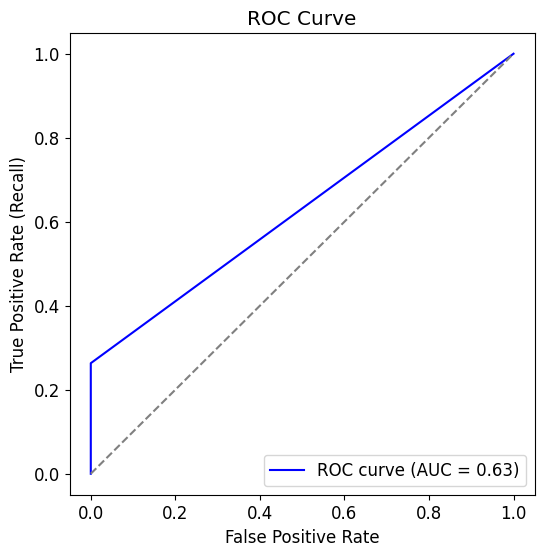

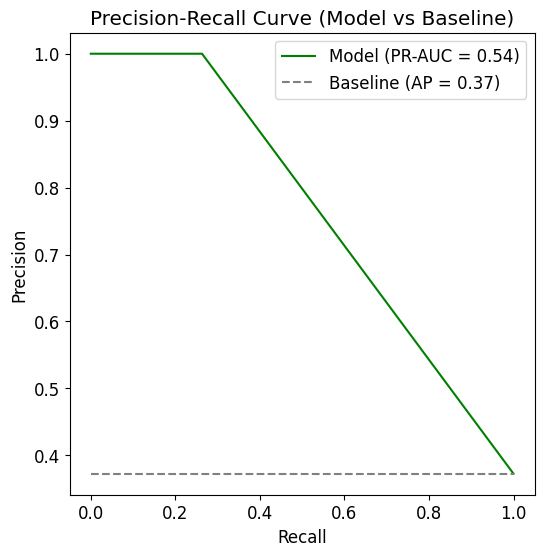

In [217]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# y_test = true binary labels (0 = no water, 1 = water)
# y_proba = predicted probabilities for the positive class (from model.predict_proba)

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(water_y_test, water_test_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("logreg_water_roc.png")
plt.show()

# ---- Precision-Recall Curve ----
# precision, recall, _ = precision_recall_curve(water_y_test, water_test_preds)
# pr_auc = average_precision_score(water_y_test, water_test_preds)

# plt.figure(figsize=(6,6))
# plt.plot(recall, precision, color="green", label=f"PR curve (AUC = {pr_auc:.2f})")
# plt.xlabel("Recall")
# plt.ylabel("Precision")
# plt.title("Precision-Recall Curve")
# plt.legend(loc="lower left")
# plt.show()
precision, recall, _ = precision_recall_curve(water_y_test, water_test_preds)
pr_auc = average_precision_score(water_y_test, water_test_preds)

# Baseline: random guessing = prevalence of positives
baseline = water_y_test.mean()   # fraction of water planets = 87/251 ≈ 0.347

# Plot
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color="green", label=f"Model (PR-AUC = {pr_auc:.2f})")
plt.hlines(baseline, 0, 1, color="gray", linestyle="--", label=f"Baseline (AP = {baseline:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Model vs Baseline)")
plt.legend()
plt.savefig("logreg_water_pr.png")
plt.show()

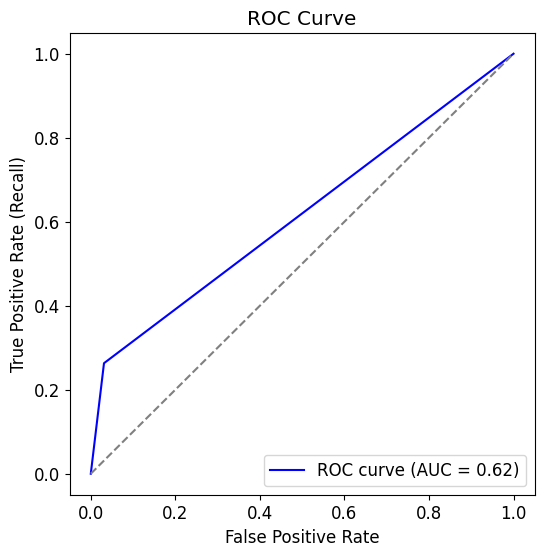

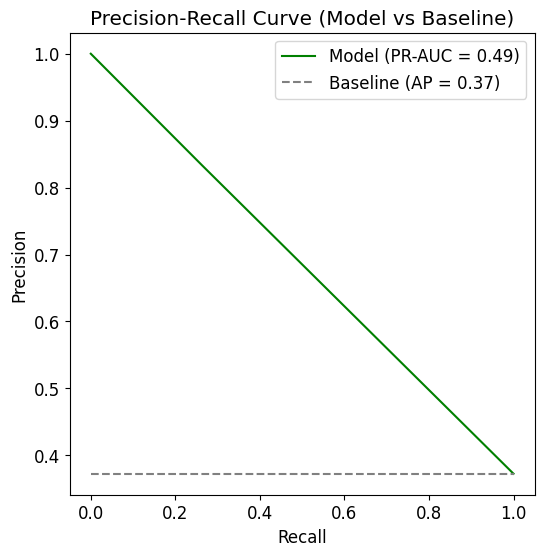

In [218]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# y_test = true binary labels (0 = no water, 1 = water)
# y_proba = predicted probabilities for the positive class (from model.predict_proba)

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(water_y_test, water_test_preds_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("rf_water_roc.png")
plt.show()

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(water_y_test, water_test_preds_rf)
pr_auc = average_precision_score(water_y_test, water_test_preds_rf)

# Baseline: random guessing = prevalence of positives
baseline = water_y_test.mean()   # fraction of water planets = 87/251 ≈ 0.347

# Plot
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color="green", label=f"Model (PR-AUC = {pr_auc:.2f})")
plt.hlines(baseline, 0, 1, color="gray", linestyle="--", label=f"Baseline (AP = {baseline:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Model vs Baseline)")
plt.legend()
plt.savefig("rf_water_pr.png")
plt.show()


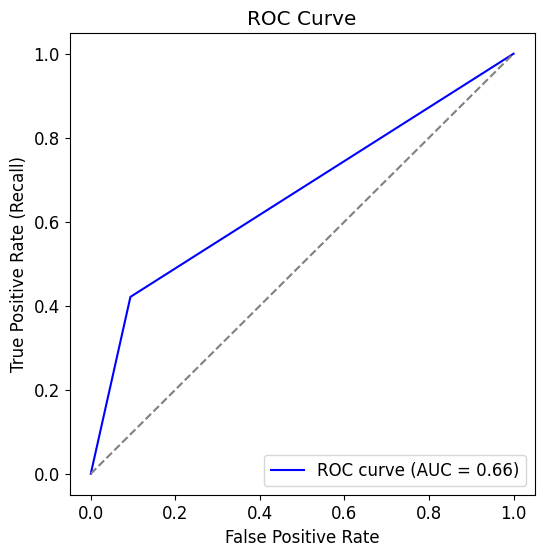

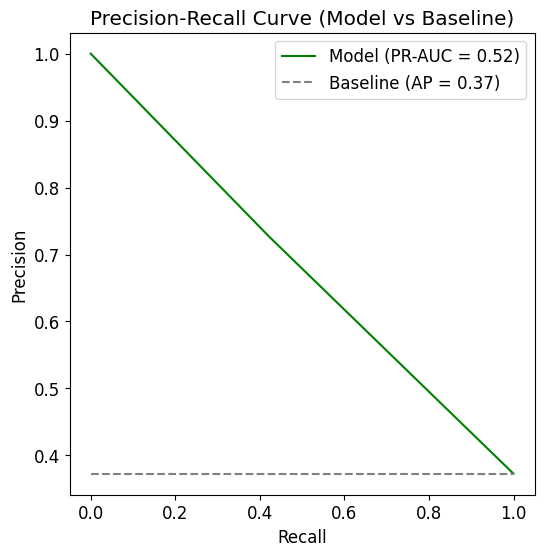

In [219]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# y_test = true binary labels (0 = no water, 1 = water)
# y_proba = predicted probabilities for the positive class (from model.predict_proba)

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(water_y_test, water_test_preds_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("gb_water_roc.png")
plt.show()

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(water_y_test, water_test_preds_gb)
pr_auc = average_precision_score(water_y_test, water_test_preds_gb)

# Baseline: random guessing = prevalence of positives
baseline = water_y_test.mean()   # fraction of water planets = 87/251 ≈ 0.347

# Plot
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color="green", label=f"Model (PR-AUC = {pr_auc:.2f})")
plt.hlines(baseline, 0, 1, color="gray", linestyle="--", label=f"Baseline (AP = {baseline:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Model vs Baseline)")
plt.legend()
plt.savefig("gb_water_pr.png")
plt.show()


In [202]:
test4 = pd.read_csv(
    "/kaggle/input/test4-table/test4_table.csv"
)
test4

,pl_name,Ag,pl_eqt,habitability_index
0,HD 40307 g,10.617065,255.00000,0.976109
1,Kepler-967 c,9.489210,258.00000,0.963353
2,OGLE-2018-BLG-0383L b,10.798712,254.09836,0.959127
3,TOI-2257 b,11.095563,256.00000,0.950799
4,Kepler-1593 b,9.947357,260.00000,0.937121
...,...,...,...,...
623,HD 12661 b,42.788194,323.42630,0.006909
624,HD 11964 b,9.760072,180.31388,0.004185
625,TRAPPIST-1 c,10.651740,339.70000,0.003442
626,NN Ser d,40.498615,182.49062,0.003400


In [203]:
test1 = pd.read_csv(
    "/kaggle/input/test1-table/test1_table.csv"
)
test1

,pl_name,Ag,pl_eqt,habitability_index
0,GJ 1151 c,9.853349,256.39640,0.982037
1,HD 40307 g,10.617065,255.00000,0.976109
2,TOI-1669 b,9.415019,256.97881,0.974619
3,Kepler-967 c,9.489210,258.00000,0.963353
4,GJ 876 e,9.311224,258.85212,0.951370
...,...,...,...,...
393,TOI-2537 b,32.143614,338.00000,0.008157
394,HD 200964 c,20.146449,339.05651,0.007742
395,TRAPPIST-1 c,10.651740,339.70000,0.003442
396,HD 158038 b,26.148384,339.54380,0.002801


In [204]:
test7 = pd.read_csv(
    "/kaggle/input/test7-table/test7_table.csv"
)
test7

,pl_name,Ag,pl_eqt,habitability_index
0,HD 40307 g,10.617065,255.00000,0.976109
1,HD 141399 e,10.340146,253.75212,0.967831
2,Kepler-967 c,9.489210,258.00000,0.963353
3,TCP J05074264+2447555 b,8.797759,252.75155,0.955877
4,TOI-2257 b,11.095563,256.00000,0.950799
...,...,...,...,...
549,HD 164509 b,6.747651,339.70744,0.002976
550,HD 290327 b,42.788194,183.86004,0.001824
551,mu Leo b,42.260388,338.68374,0.000788
552,Kepler-47 d,3.760896,339.90992,0.000499


In [177]:
k=0
for i in test1['pl_name']:
    for j in test7['pl_name']:
        if i.lower().strip() == j.lower().strip():
            k+=1


k

376

In [178]:
k=0
for i in test4['pl_name']:
    for j in test1['pl_name']:
        if i.lower().strip() == j.lower().strip():
            k+=1


k
    

367

In [179]:
k=0
for i in test7['pl_name']:
    for j in planets_with_water:
        if i.lower().strip() == j.lower().strip():
            k+=1
            print(i)


k

HD 4208 b
HD 11964 b
HD 10180 g
HD 37124 d
HD 74698 c
K2-18 b
HD 10180 h
HD 564 b
75 Cet c
HD 8535 b
HD 25171 b
LHS 1140 b
HD 50499 b
HD 17674 b
HD 23127 b
HD 4113 b
HD 7199 b
47 UMa c
HD 3765 b
HD 27631 b
HD 6718 b
HD 12661 c
2MASS J19383260+4603591 b
NN Ser d
NY Vir b
HD 65216 c
HD 32963 b
HD 10647 b


28

In [180]:
k=0
for i in test1['pl_name']:
    for j in planets_with_water:
        if i.lower().strip() == j.lower().strip():
            k+=1
            print(i)


k
    

HD 10180 g
HD 564 b
HD 10180 h
K2-18 b
HD 11964 b
HD 4208 b
LHS 1140 b
HD 10647 b
HD 4113 b
GJ 317 c
HD 8535 b
HD 6718 b
HD 12661 c
HD 7199 b
HD 17674 b
HD 23127 b
HD 32963 b
HD 74698 c
HD 27631 b
HD 37124 d
NY Vir b
HD 65216 c
2MASS J19383260+4603591 b


23

In [155]:
test1.loc[test1['pl_name'] == "HD 564 b", 'habitability_index']


50    0.787447
Name: habitability_index, dtype: float64

In [ ]:
test7[['pl_name'] == ]

test7['habitability_index'] = test7['habitability_index']

In [205]:
# Merge test1 with df on the planet name column
test1 = test1.merge(
    df[['pl_name', 'has_water']],   # only keep the columns we need from df
    on='pl_name', 
    how='left'   # keeps all rows from test1, adds matches from df
)
test1


,pl_name,Ag,pl_eqt,habitability_index,has_water
0,GJ 1151 c,9.853349,256.39640,0.982037,0
1,HD 40307 g,10.617065,255.00000,0.976109,0
2,TOI-1669 b,9.415019,256.97881,0.974619,0
3,Kepler-967 c,9.489210,258.00000,0.963353,0
4,GJ 876 e,9.311224,258.85212,0.951370,0
...,...,...,...,...,...
393,TOI-2537 b,32.143614,338.00000,0.008157,0
394,HD 200964 c,20.146449,339.05651,0.007742,0
395,TRAPPIST-1 c,10.651740,339.70000,0.003442,0
396,HD 158038 b,26.148384,339.54380,0.002801,0


In [206]:
mask = test1['has_water'] == 1
test1.loc[mask, 'habitability_index'] = test1.loc[mask, 'habitability_index'] ** 0.5
test1 = test1.sort_values(by='habitability_index', ascending=False).reset_index(drop=True)


test1

,pl_name,Ag,pl_eqt,habitability_index,has_water
0,GJ 1151 c,9.853349,256.39640,0.982037,0
1,HD 40307 g,10.617065,255.00000,0.976109,0
2,TOI-1669 b,9.415019,256.97881,0.974619,0
3,Kepler-967 c,9.489210,258.00000,0.963353,0
4,HD 10180 g,8.699151,261.28806,0.953799,1
...,...,...,...,...,...
393,TOI-2537 b,32.143614,338.00000,0.008157,0
394,HD 200964 c,20.146449,339.05651,0.007742,0
395,TRAPPIST-1 c,10.651740,339.70000,0.003442,0
396,HD 158038 b,26.148384,339.54380,0.002801,0


In [207]:
# Merge test1 with df on the planet name column
test4 = test4.merge(
    df[['pl_name', 'has_water']],   # only keep the columns we need from df
    on='pl_name', 
    how='left'   # keeps all rows from test1, adds matches from df
)
test4

,pl_name,Ag,pl_eqt,habitability_index,has_water
0,HD 40307 g,10.617065,255.00000,0.976109,0
1,Kepler-967 c,9.489210,258.00000,0.963353,0
2,OGLE-2018-BLG-0383L b,10.798712,254.09836,0.959127,0
3,TOI-2257 b,11.095563,256.00000,0.950799,0
4,Kepler-1593 b,9.947357,260.00000,0.937121,0
...,...,...,...,...,...
623,HD 12661 b,42.788194,323.42630,0.006909,0
624,HD 11964 b,9.760072,180.31388,0.004185,1
625,TRAPPIST-1 c,10.651740,339.70000,0.003442,0
626,NN Ser d,40.498615,182.49062,0.003400,1


In [208]:
mask = test4['has_water'] == 1
test4.loc[mask, 'habitability_index'] = test4.loc[mask, 'habitability_index'] ** 0.5
test4 = test4.sort_values(by='habitability_index', ascending=False).reset_index(drop=True)


test4

,pl_name,Ag,pl_eqt,habitability_index,has_water
0,HD 40307 g,10.617065,255.00000,0.976109,0
1,Kepler-967 c,9.489210,258.00000,0.963353,0
2,OGLE-2018-BLG-0383L b,10.798712,254.09836,0.959127,0
3,HD 10180 g,8.699151,260.84170,0.956500,1
4,TOI-2257 b,11.095563,256.00000,0.950799,0
...,...,...,...,...,...
623,OGLE-2012-BLG-0358L b,32.091780,337.97637,0.008290,0
624,TOI-2537 b,32.143614,338.00000,0.008157,0
625,HD 12661 b,42.788194,323.42630,0.006909,0
626,TRAPPIST-1 c,10.651740,339.70000,0.003442,0


In [209]:
# Merge test1 with df on the planet name column
test7 = test7.merge(
    df[['pl_name', 'has_water']],   # only keep the columns we need from df
    on='pl_name', 
    how='left'   # keeps all rows from test1, adds matches from df
)
test7

,pl_name,Ag,pl_eqt,habitability_index,has_water
0,HD 40307 g,10.617065,255.00000,0.976109,0
1,HD 141399 e,10.340146,253.75212,0.967831,0
2,Kepler-967 c,9.489210,258.00000,0.963353,0
3,TCP J05074264+2447555 b,8.797759,252.75155,0.955877,0
4,TOI-2257 b,11.095563,256.00000,0.950799,0
...,...,...,...,...,...
549,HD 164509 b,6.747651,339.70744,0.002976,0
550,HD 290327 b,42.788194,183.86004,0.001824,0
551,mu Leo b,42.260388,338.68374,0.000788,0
552,Kepler-47 d,3.760896,339.90992,0.000499,0


In [211]:
test7.loc[test7['pl_name'] == "HD 4208 b", 'habitability_index']


10    0.916833
Name: habitability_index, dtype: float64

In [210]:
mask = test7['has_water'] == 1
test7.loc[mask, 'habitability_index'] = test7.loc[mask, 'habitability_index'] ** 0.5
test7 = test7.sort_values(by='habitability_index', ascending=False).reset_index(drop=True)


test7

,pl_name,Ag,pl_eqt,habitability_index,has_water
0,HD 40307 g,10.617065,255.00000,0.976109,0
1,HD 141399 e,10.340146,253.75212,0.967831,0
2,Kepler-967 c,9.489210,258.00000,0.963353,0
3,TCP J05074264+2447555 b,8.797759,252.75155,0.955877,0
4,TOI-2257 b,11.095563,256.00000,0.950799,0
...,...,...,...,...,...
549,HD 164509 b,6.747651,339.70744,0.002976,0
550,HD 290327 b,42.788194,183.86004,0.001824,0
551,mu Leo b,42.260388,338.68374,0.000788,0
552,Kepler-47 d,3.760896,339.90992,0.000499,0


In [212]:
water_test1_table = test1.copy()
water_test4_table = test4.copy()
water_test7_table = test7.copy()

In [216]:
water_test1_table.to_csv("water_test1_table.csv", index=False)
water_test4_table.to_csv("water_test4_table.csv", index=False)
water_test7_table.to_csv("water_test7_table.csv", index=False)



## How to incorporate atmospheric data into a metric: 
1. take the sqrt the old habitability index if there is water detected
2. create a new metric/index of just molecules and then multiple that one by the old index
3. if there is no water then you can square the old index value
4. Water is most important, CHNOPS is second most important (not individual), and other metals are third (potassium is decently important or sodium)
5. iron might be important for having a magnetic field

Methods to boost the habitablity index for having these elements:
1. sqrt curve
2. raise the old habitablity index to the 0.8 power or 0.75 or something else
3. 

Creating the PINN columns

In [ ]:
pinn_df = df.copy()
SB_Constant = 5.670374419e-8

In [ ]:
#star luminosity
Luminosity = 4*np.pi*((pinn_df['st_rad']*6.957e8) ** 2) * SB_Constant * (pinn_df['st_teff'] ** 4)
pinn_df['luminosity'] = Luminosity
pinn_df['luminosity']

In [ ]:
pinn_df['log10luminosity'] = np.log10(pinn_df['luminosity'])

sun_luminosity = np.log10(3.828e26)

plt.figure(figsize=(8, 5))
plt.hist(pinn_df['log10luminosity'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(sun_luminosity, color='red', linestyle='dashed', linewidth=2, label=f"Sun's luminosity log10= {sun_luminosity:.3f}")

plt.title('Histogram of Stellar Luminosities')
plt.xlabel('Log 10 Luminosities')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Flux is the energy per unit area that the planet intercepts from the star
Flux = pinn_df['luminosity'] / (4 * np.pi * ((pinn_df['pl_orbsmax']*1.496e11)**2))
pinn_df['Flux'] = Flux
pinn_df['Flux']

In [ ]:
pinn_df['log10flux'] = np.log10(pinn_df['Flux'])

earth_flux = np.log10(1361)

plt.figure(figsize=(8, 5))
plt.hist(pinn_df['log10flux'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(earth_flux, color='red', linestyle='dashed', linewidth=2, label=f"Earth's log 10 Flux= {earth_flux:.3f}")

plt.title('Histogram of Planetary Fluxes')
plt.xlabel('Fluxes in W/m^2')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# L_abs is amount of energy that a planet absorbs (it absorbs only part of the flux)
alpha = 1

#pi*r^2 is the cross-sectional area that faces the star
L_abs = alpha * pinn_df['Flux'] * np.pi * ((pinn_df['pl_rade']*6.378e6)**2)
pinn_df['L_abs'] = L_abs
pinn_df['L_abs']

In [ ]:
#the equilibrium temperature is the temp where the absorbed energy of the planet = the emitted energy
# so that is α*F*π*R^2= 4*π*R^2*σ*T^4. The radius cancels to get that T = (a*F/4*σ)^0.25


T_eq = ((alpha*pinn_df['Flux']) / (4*SB_Constant))**(1/4)
pinn_df['T_eq'] = T_eq
pinn_df['T_eq']

In [ ]:
pinn_df['pl_eqt'].fillna(pinn_df['pl_eqt'].median(), inplace=True)
pinn_df['pl_rade'].fillna(pinn_df['pl_rade'].median(), inplace=True)
pinn_df['Flux'].fillna(pinn_df['Flux'].median(), inplace=True)

        

In [ ]:
from fastai.tabular.all import *
import torch
import torch.nn as nn
import torch.nn.functional as F


sigma = 5.670374419e-8  # Stefan-Boltzmann constant

# Feature and target columns
cont_names = ['Flux']
y_names = 'pl_eqt'

# Use only FillMissing (no Normalize)
to = TabularPandas(
    pinn_df,
    cont_names=cont_names,
    y_names=y_names,
    splits=RandomSplitter(seed=42)(range_of(pinn_df)),
    procs=[]
)

# DataLoaders
dls = to.dataloaders(bs=64)

# Physics-Informed Model
class AlphaModel(nn.Module):
    def __init__(self, n_cont):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_cont, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    def forward(self, x_cat, x_cont):
         #NN in float32
        alpha = self.layers(x_cont).squeeze(-1)          # ~ (0,1)
        # Physics in float64 for stability
        alpha  = alpha.double()
        flux   = torch.clamp(x_cont[:, 0].double(), min=1e-12)  # F in W/m^2
        # If your second column is radius, we IGNORE it here on purpose.

        # Correct Stefan–Boltzmann equilibrium (uniform reradiation)
        term = torch.clamp(alpha * flux / (4.0 * sigma), min=1e-12)
        T_eq_pred = torch.pow(term, 0.25)

        return T_eq_pred.float()
    

# Loss function
def mse_loss(preds, targets):
    return F.mse_loss(preds, targets)

# Learner
model = AlphaModel(len(cont_names))
model.layers[2].bias.data.fill_(0.847)  # sigmoid(-4.6) ≈ 0.01
learn = Learner(dls, model, loss_func=mse_loss, metrics=rmse)

# Train
learn.fit_one_cycle(10, 1e-3)
